# Segmentasi Wisatawan Berbasis Preferensi Destinasi Menggunakan Teknik Clustering dan Reduksi Dimensi

- **Nama: Adinda Nur Isnaini**
- **NIM: 23/517340/PA/22176**

# Pendahuluan

Terdapat dua tipe orang dalam melakukan rekreasi atau berwisata. Tipe pertama adalah mereka yang senang mengunjungi tempat wisata yang sama secara berulang, sementara tipe kedua lebih suka mengeksplorasi destinasi-destinasi baru. Bagi tipe kedua, mengeksplorasi tempat baru sering kali menjadi tantangan karena minimnya informasi atau pengalaman sebelumnya terkait destinasi tersebut.

Salah satu cara untuk memperoleh informasi adalah melalui internet dan media sosial. Namun, banyaknya informasi yang tersedia justru bisa menyulitkan, karena membutuhkan waktu dan usaha yang cukup besar untuk menyaring data yang benar-benar relevan dan terpercaya. Dalam kondisi ini, sistem rekomendasi menjadi solusi yang efektif.

Sistem rekomendasi yang baik mampu menyajikan informasi yang sesuai dengan preferensi dan kebutuhan pengguna. Sistem ini bekerja dengan menganalisis kebiasaan, minat, atau karakteristik pengguna, sehingga dapat memberikan rekomendasi destinasi wisata yang relevan dan personal. Selain itu, sistem rekomendasi juga membantu mengurangi waktu pencarian informasi dan meningkatkan kepuasan pengguna dalam merencanakan perjalanan mereka.

Salah satu pendekatan alternatif yang dapat meningkatkan efisiensi sistem rekomendasi adalah penggunaan teknik *clustering*. Teknik ini mengelompokkan pengguna atau data ke dalam beberapa klaster berdasarkan kesamaan tertentu. Namun, teknik clustering sangat bergantung pada pemilihan algoritma yang tepat dan kualitas proses pengelompokan. Oleh karena itu, penting untuk melakukan evaluasi terhadap berbagai algoritma clustering guna mengetahui algoritma yang paling sesuai untuk diterapkan dalam sistem rekomendasi di bidang pariwisata.

# Data

Dataset yang digunakan untuk studi kasus ini diambil dari UCI Machine Learning Repository dengan judul ***Travel Review Ratings***. Dataset ini didapatkan dengan mengambil data *rating* pengguna (skala 1-5) terhadap objek wisata di seluruh Eropa dari ulasan Google. Ulasan tersebut terdiri dari 24 kategori sebagai berikut.
1. Kategori 1: churches
2. Kategori 2: resorts
3. Kategori 3: beaches
4. Kategori 4: parks
5. Kategori 5: theatres
6. Kategori 6: museums
7. Kategori 7: malls
8. Kategori 8: zoo
9. Kategori 9: restaurants
10. Kategori 10: pubs/bars
11. Kategori 11: local services
12. Kategori 12: burger/pizza shops
13. Kategori 13: hotels/other lodgings
14. Kategori 14: juice bars
15. Kategori 15: art galleries
16. Kategori 16: dance clubs
17. Kategori 17: swimming pools
18. Kategori 18: gyms
19. Kategori 19: bakeries
20. Kategori 20: beauty & spas
21. Kategori 21: cafes
22. Kategori 22: view points
23. Kategori 23: monuments
24. Kategori 24: gardens

Kategori-kategori tersebut merupakan kolom-kolom pada dataset. Artinya, dataset memiliki 24 variabel/kolom (25 variabel/kolom apabila *user* ID dimasukkan). Jumlah observasi pada dataset ini adalah sebanyak 5456 observasi.

Tautan data: https://archive.ics.uci.edu/dataset/485/tarvel+review+ratings


In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\acer\Downloads\tarvel+review+ratings\google_review_ratings.csv')
data

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0        User 1        0.00        0.00        3.63        3.65        5.00   
1        User 2        0.00        0.00        3.63        3.65        5.00   
2        User 3        0.00        0.00        3.63        3.63        5.00   
3        User 4        0.00        0.50        3.63        3.63        5.00   
4        User 5        0.00        0.00        3.63        3.63        5.00   
...         ...         ...         ...         ...         ...         ...   
5451  User 5452        0.91        5.00        4.00        2.79        2.77   
5452  User 5453        0.93        5.00        4.02        2.79        2.78   
5453  User 5454        0.94        5.00        4.03        2.80        2.78   
5454  User 5455        0.95        4.05        4.05        2.81        2.79   
5455  User 5456        0.95        4.07        5.00        2.82        2.80   

      Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0           2.92        5.00        2.35        2.33  ...         0.59   
1           2.92        5.00        2.64        2.33  ...         0.59   
2           2.92        5.00        2.64        2.33  ...         0.59   
3           2.92        5.00        2.35        2.33  ...         0.59   
4           2.92        5.00        2.64        2.33  ...         0.59   
...          ...         ...         ...         ...  ...          ...   
5451        2.57        2.43        1.09        1.77  ...         0.66   
5452        2.57        1.77        1.07        1.76  ...         0.65   
5453        2.57        1.75        1.05        1.75  ...         0.65   
5454        2.44        1.76        1.03        1.74  ...         0.64   
5455        2.57        2.42        1.02        1.74  ...         0.64   

     Category 17  Category 18  Category 19  Category 20  Category 21  \
0           0.50         0.00         0.50         0.00         0.00   
1           0.50         0.00         0.50         0.00         0.00   
2           0.50         0.00         0.50         0.00         0.00   
3           0.50         0.00         0.50         0.00         0.00   
4           0.50         0.00         0.50         0.00         0.00   
...          ...          ...          ...          ...          ...   
5451        0.65         0.66         0.69         5.00         1.05   
5452        0.64         0.65         1.59         1.62         1.06   
5453        0.63         0.64         0.74         5.00         1.07   
5454        0.63         0.64         0.75         5.00         1.08   
5455        0.62         0.63         0.78         5.00         1.08   

      Category 22  Category 23  Category 24  Unnamed: 25  
0             0.0          0.0         0.00          NaN  
1             0.0          0.0         0.00          NaN  
2             0.0          0.0         0.00          NaN  
3             0.0          0.0         0.00          NaN  
4             0.0          0.0         0.00          NaN  
...           ...          ...          ...          ...  
5451          5.0          5.0         1.56          NaN  
5452          5.0          5.0         1.09          NaN  
5453          5.0          5.0         1.11          NaN  
5454          5.0          5.0         1.12          NaN  
5455          5.0          5.0         1.17          NaN  

[5456 rows x 26 columns]

# Metodologi

## Feature Selection / Dimensionality Reduction

Banyaknya dimensi pada suatu dataset merupakan salah satu masalah yang sering muncul pada analisis data multivariat. Untuk menangani hal tersebut, jumlah dimensi pada data perlu dikurangi dengan reduksi dimensi atau ***dimensionality reduction***. *Dimensionality reduction* adalah proses transformasi data berdimensi tinggi menjadi representasi yang lebih bermakna dengan dimensi yang lebih rendah. Tujuan dari *dimensionality reduction* adalah untuk merepresentasikan data ke dalam ruang berdimensi lebih rendah, dengan tetap mempertahankan sebagian sifat asli dari data tersebut. Pada tugas ini, akan dilakukan *dimensionality reduction* berupa ***Principal Component Analysis* (PCA)** dan ***Multiple Correspondence Analysis* (MCA)**.

*Principal Component Analysis* (PCA) adalah teknik untuk mengurangi dimensi suatu data dengan menciptakan sekumpulan variabel baru yang jumlahnya lebih sedikit dari variabel asli, namun tetap mempertahankan sebagian besar informasi dari data tersebut. Hasil dari PCA berupa komponen-komponen utama (PC) yang berupa kombinasi linier sebegai berikut.
$$PC_1 = a'_1 X = a_{11} X_1 + a_{12} X_2 + ... + a_{1p} X_p$$
$$PC_2 = a'_2 X = a_{21} X_1 + a_{22} X_2 + ... + a_{12p} X_p$$
$$PC_p = a'_p X = a_{p1} X_1 + a_{p2} X_2 + ... + a_{pp} X_p$$
dengan:
* $X_1, ..., X_p$: data observasi
* $p$: ukuran matriks kovarians $\Sigma$
* $a_i$: *eigenvector*, $i = 1, 2, ..., p$

Jumlah komponen utama atau *principal component* (PC) yang sebaiknya dipertahankan dapat ditentukan melalui nilai total variansi dari PC. Menurut Lee et al. (2023), mempertahankan komponen utama yang menjelaskan **setidaknya 70% dari total variansi** sudah cukup untuk melestarikan informasi utama dalam dataset.

*Multiple Correspondence Analysis* (MCA) adalah sebuah metode yang dirancang untuk mengurangi dimensi data. MCA menyajikan setiap kategori dari variabel-variabel dalam sebuah ruang vektor berdimensi kecil secara optimal. MCA merupakan pengembangan dari *Correspondence Analysis* (CA) yang digunakan untuk menganalisis pola hubungan dari beberapa variabel kategorikal.

Pada tugas ini, dilakukan PCA untuk mengurangi dimensi variabel atau fitur numerik dan MCA untuk mengurangi dimensi dari variabel atau fitur kategorik.

## Clustering

*Clustering* adalah teknik *unsupervised learning* yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok (klaster) berdasarkan kemiripan atau kedekatan karakteristik antar data. Tujuan utama *clustering* adalah agar objek-objek dalam satu klaster memiliki karakteristik yang lebih mirip satu sama lain dibandingkan dengan objek-objek di klaster lain. Teknik ini banyak digunakan dalam analisis eksploratori data, segmentasi pasar, sistem rekomendasi, dan pengenalan pola. Pada tugas ini, dilakukan *clustering* dengan 4 algoritma, yaitu *K-Means Clustering*, *K-Medoids Clustering*, *Agglomerative Hierarchical Clustering*, dan *Gaussian Mixture Model*.

*K-means*  adalah algoritma partisi yang membagi data ke dalam k klaster berdasarkan kedekatan data terhadap pusat klaster (centroid). Prosesnya melibatkan inisialisasi pusat klaster, pengelompokan data berdasarkan pusat terdekat, lalu pembaruan pusat berdasarkan rata-rata anggota klaster, hingga konvergen.

*K-medoids* mirip dengan *k-means*, tetapi menggunakan data nyata sebagai pusat klaster (*medoid*), bukan rata-rata. Ini membuatnya lebih tahan terhadap *outlier* dan *noise*. 

*Agglomerative hierarchical clustering* adalah metode bottom-up. Setiap data awalnya merupakan satu klaster yang kemudian digabung secara berurutan berdasarkan kedekatan hingga membentuk satu hirarki klaster. Proses ini dapat divisualisasikan dalam bentuk dendrogram. Namun, pada analisis ini, dendogram tidak ditampilkan. Sebagai gantinya, akan ditampilkan *silhouette score* untuk mendapatkan jumlah klaster yang paling optimal.

*Gaussian Mixture Model* (GMM) adalah model probabilistik yang mengasumsikan data berasal dari kombinasi beberapa distribusi normal (Gaussian). GMM menggunakan algoritma Expectation-Maximization (EM) untuk mengestimasi parameter distribusi, dan memberikan probabilitas keanggotaan suatu data dalam tiap klaster, tidak hanya satu klaster pasti.

# Prepemrosesan Data

In [2]:
# Preprocessing 

# 1. Drop kolom yang tidak berguna
rating_data = data.drop(columns=['Unnamed: 25','User'])

# 2. Ubah tipe data menjadi numerik
for col in rating_data.columns:
    rating_data[col] = pd.to_numeric(rating_data[col], errors='coerce')

In [3]:
# 3. Periksa dan tangani missing value
rating_data.isna().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    1
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [4]:
rating_data.dropna(inplace=True)
rating_data.isna().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [5]:
# 4. Periksa dan tangani data duplikat
rating_data.duplicated().any()

True

In [6]:
duplicates = rating_data[rating_data.duplicated()]
print(duplicates)

      Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
4           0.00         0.0        3.63        3.63        5.00        2.92   
674         0.00         0.0        1.45        1.43        1.42        1.43   
1346        1.06         1.1        5.00        3.28        5.00        5.00   

      Category 7  Category 8  Category 9  Category 10  ...  Category 15  \
4           5.00        2.64        2.33         2.64  ...         1.74   
674         1.48        1.48        2.72         2.73  ...         5.00   
1346        5.00        1.84        1.81         5.00  ...         1.77   

      Category 16  Category 17  Category 18  Category 19  Category 20  \
4            0.59          0.5          0.0         0.50          0.0   
674          0.81          0.8          5.0         0.92          0.0   
1346         1.80          0.0          0.0         0.00          0.0   

      Category 21  Category 22  Category 23  Category 24  
4             0.0         

In [7]:
rating_data = rating_data.drop_duplicates()

In [8]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5451 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5451 non-null   float64
 1   Category 2   5451 non-null   float64
 2   Category 3   5451 non-null   float64
 3   Category 4   5451 non-null   float64
 4   Category 5   5451 non-null   float64
 5   Category 6   5451 non-null   float64
 6   Category 7   5451 non-null   float64
 7   Category 8   5451 non-null   float64
 8   Category 9   5451 non-null   float64
 9   Category 10  5451 non-null   float64
 10  Category 11  5451 non-null   float64
 11  Category 12  5451 non-null   float64
 12  Category 13  5451 non-null   float64
 13  Category 14  5451 non-null   float64
 14  Category 15  5451 non-null   float64
 15  Category 16  5451 non-null   float64
 16  Category 17  5451 non-null   float64
 17  Category 18  5451 non-null   float64
 18  Category 19  5451 non-null   float64
 19  Category 20

**Penjelasan:**

Prepemrosesan data mencakup empat tahap, yaitu:
1. **Menghapus kolom yang tidak berguna:** dua kolom yang tidak digunakan adalah `Unnamed: 25` dan `User`.
2. **Mengubah tipe data menjadi numerik:** *rating* dari 24 kategori harus bertipe numerik.
3. **Memeriksa dan menangani *missing value*:** didapatkan masing-masing 1 value pada variabel `Category 11`, `Category 12`, dan `Category 24`. Hal tersebut ditangani dengan cara menghapus baris yang mengandung *missing value*.
4. **Memeriksa dan menangani data duplikat:** hasil pemeriksaan data duplikat menunjukkan bahwa terdapat 3 baris data yang terduplikat. Hal tersebut ditangani dengan menghapus baris data yang terduplikat (hanya mempertahankan baris terduplikat pertama).


Hasil dari prepemrosesan data adalah data yang bersih (tidak ada *missing value* dan data terduplikat) dengan jumlah observasi sebesar `5451`.

In [9]:
# Pembuatan Fitur Baru

# 1. Total Rating (numerik)
rating_data['Total Rating'] = rating_data.sum(axis=1)

# 2. Categories Count (numerik)
rating_data['Categories Count'] = (rating_data != 0).sum(axis=1)

In [10]:
# 3. Dominant Interest Type (kategorik)
nature_cols = ['Category 3', 'Category 4', 'Category 22', 'Category 24']
culture_cols = ['Category 1', 'Category 5', 'Category 6', 'Category 15', 'Category 23']
entertainment_cols = ['Category 7', 'Category 8', 'Category 16', 'Category 17', 'Category 18']
culinary_cols = ['Category 9', 'Category 10', 'Category 12', 'Category 14', 'Category 19', 'Category 21']
services_cols = ['Category 2', 'Category 11', 'Category 13', 'Category 20']

rating_data['Nature_Score'] = rating_data[nature_cols].mean(axis=1)
rating_data['Culture_Score'] = rating_data[culture_cols].mean(axis=1)
rating_data['Entertainment_Score'] = rating_data[entertainment_cols].mean(axis=1)
rating_data['Culinary_Score'] = rating_data[culinary_cols].mean(axis=1)
rating_data['Services_Score'] = rating_data[services_cols].mean(axis=1)

def get_dominant_type(row):
    scores = {
        'Nature': row['Nature_Score'],
        'Culture': row['Culture_Score'],
        'Entertainment': row['Entertainment_Score'],
        'Culinary': row['Culinary_Score'],
        'Services': row['Services_Score']
    }
    return max(scores, key=scores.get)

rating_data['Dominant Interest Type'] = rating_data.apply(get_dominant_type, axis=1)

In [11]:
rating_data.head()

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0         0.0         0.0        3.63        3.65         5.0        2.92   
1         0.0         0.0        3.63        3.65         5.0        2.92   
2         0.0         0.0        3.63        3.63         5.0        2.92   
3         0.0         0.5        3.63        3.63         5.0        2.92   
5         0.0         0.0        3.63        3.63         5.0        2.92   

   Category 7  Category 8  Category 9  Category 10  ...  Category 23  \
0         5.0        2.35        2.33         2.64  ...          0.0   
1         5.0        2.64        2.33         2.65  ...          0.0   
2         5.0        2.64        2.33         2.64  ...          0.0   
3         5.0        2.35        2.33         2.64  ...          0.0   
5         5.0        2.63        2.33         2.65  ...          0.0   

   Category 24  Total Rating  Categories Count  Nature_Score  Culture_Score  \
0          0.0         37.66                17         1.820          1.932   
1          0.0         37.96                17         1.820          1.932   
2          0.0         37.93                17         1.815          1.932   
3          0.0         38.17                18         1.815          1.932   
5          0.0         37.93                17         1.815          1.932   

   Entertainment_Score  Culinary_Score  Services_Score  Dominant Interest Type  
0                1.688        1.480000          0.8500                 Culture  
1                1.746        1.481667          0.8500                 Culture  
2                1.746        1.480000          0.8500                 Culture  
3                1.688        1.480000          0.9825                 Culture  
5                1.744        1.481667          0.8500                 Culture  

[5 rows x 32 columns]

In [12]:
rating_data['Dominant Interest Type'].unique()

array(['Culture', 'Services', 'Nature', 'Entertainment', 'Culinary'],
      dtype=object)

**Penjelasan:**

Dilakukan penambahan 8 fitur baru sebagai berikut.
* **`Total Rating` (numerik):** penjumlahan dari seluruh *rating* dari seluruh kategori oleh setiap *user*.
* **`Categories Count` (numerik):** jumlah kategori yang *rating*-nya diisi oleh *user*. Pada dataset ini, banyak *user* yang hanya mengisi *rating* pada sebagian kategori saja. Oleh karena itu, variabel ini diperlukan untuk mengetahui jumlah kategori yang diisi (misal `Count Category = 15`, maka *user* tersebut hanya mengisi *rating* 15 dari 24 kategori tempat wisata).
* **`Dominant Interest Type` (kategorik):** tipe ketertarikan dari setiap *user* atau wisatawan dari berbagai macam tempat wisata. Pada variabel ini, terdapat 4 tipe variabel yang ditentukan berdasarkan rata-rata pengisian kategori tertentu, yaitu `Nature` (pantai, taman, pemandangan, kebun), `Culture` (gereja, teater, museum, galeri seni, monumen), `Entertainment` (mall, kebun binatang, klub tari, kolam renang, gym), `Culinary` (restoran, bar, toko burger/pizza, bar jus, toko roti, kafe), dan `Services` (pelayanan daerah, resort, hotel/penginapan, dan spa kecantikan). Untuk membentuk fitur baru ini, telah dibentuk 5 fitur numerik baru yang akan dijelaskan pada poin berikutnya.
* **`Nature Score` (numerik):** rata-rata *rating* dari tempat wisata bertema alam yang diberikan oleh setiap pengguna (*user*). Fitur ini digunakan untuk menentukan nilai pada fitur `Dominant Interest Type`. Jika skor pada fitur ini merupakan yang tertinggi dibandingkan skor lainnya, maka nilai pada `Dominant Interest Type` akan diisi dengan `Nature`.
* **`Culture Score` (numerik):** rata-rata *rating* dari tempat wisata budaya yang diberikan oleh setiap pengguna (*user*). Fitur ini digunakan untuk menentukan nilai pada fitur `Dominant Interest Type`. Jika skor pada fitur ini merupakan yang tertinggi dibandingkan skor lainnya, maka nilai pada `Dominant Interest Type` akan diisi dengan `Culture`.
* **`Entertainment Score` (numerik):** rata-rata *rating* dari tempat wisata hiburan yang diberikan oleh setiap pengguna (*user*). Fitur ini digunakan untuk menentukan nilai pada fitur `Dominant Interest Type`. Jika skor pada fitur ini merupakan yang tertinggi dibandingkan skor lainnya, maka nilai pada `Dominant Interest Type` akan diisi dengan `Entertainment`.
* **`Culinary Score` (numerik):** rata-rata *rating* dari tempat wisata kuliner yang diberikan oleh setiap pengguna (*user*). Fitur ini digunakan untuk menentukan nilai pada fitur `Dominant Interest Type`. Jika skor pada fitur ini merupakan yang tertinggi dibandingkan skor lainnya, maka nilai pada `Dominant Interest Type` akan diisi dengan `Culinary`.
* **`Services Score` (numerik):** rata-rata *rating* dari tempat wisata bertema layanan yang diberikan oleh setiap pengguna (*user*). Fitur ini digunakan untuk menentukan nilai pada fitur `Dominant Interest Type`. Jika skor pada fitur ini merupakan yang tertinggi dibandingkan skor lainnya, maka nilai pada `Dominant Interest Type` akan diisi dengan `Services`.

# Hasil dan Pembahasan

## Exploratory Data Analysis (EDA)

In [13]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

### Distribusi Rating per Kategori Wisata (Boxplot)

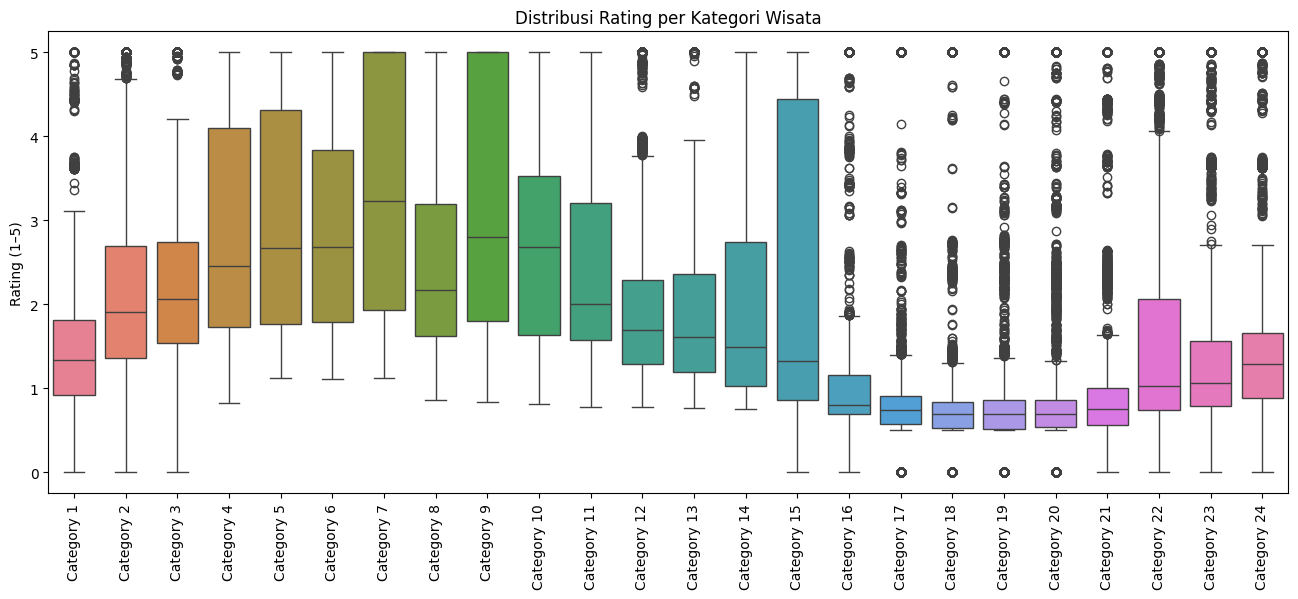

In [14]:
category_cols = [col for col in rating_data.columns if 'Category' in col]

# 1. Plot boxplot semua kategori
plt.figure(figsize=(16, 6))
sns.boxplot(data=rating_data[category_cols])
plt.xticks(rotation=90)
plt.title("Distribusi Rating per Kategori Wisata")
plt.ylabel("Rating (1–5)")
plt.show()

**Penjelasan:**

Boxplot di atas menunjukkan distribusi dari nilai *rating* pada 24 kategori. Sebanyak 24 boxplot di atas memiliki distribusi yang beragam sehingga bentuk setiap boxplot berbeda-beda.
* **Kotak yang lebar dengan *whisker* bawah:** menunjukkan bahwa distribusi nilai *rating* pada kategori tersebut sangat tersebar dan banyak nilai rating berada pada rentang bawah, yaitu pada kategori 7 (*malls*) dan 9 (*restaurants*). Hal ini juga menunjukkan bahwa pengguna memberikan penilaian yang bervariasi dan banyak yang memberikan rating rendah. Pada kedua kategori tersebut, boxpot tidak menyentuh nilai 0 sehingga dapat disimpulkan bahwa seluruh pengguna mengisi *rating* pada kategori tersebut (tidak ada yang memberi *rating* 0).
* **Kotak interkuartil atas yang lebar dengan *whisker* atas dan bawah:** menunjukkan bahwa persebaran nilai *rating* lebih besar di kuartil atas (Q3), dengan persebaran keseluruhan yang luas, yaitu pada kategori 4 (*parks*), 5 (*theaters*), 6 (*museums*), 8 (*zoo*), 11 (*local services*), 14 (*juice bars*), dan 15 (*art galleries*). Hal ini juga mengindikasikan bahwa pengguna memberi *rating* yang bervariasi, tetapi banyak yang memberi *rating* tinggi.
* **Kotak interkuartil bawah yang lebar dengan *whisker* atas dan bawah:** menunjukkan bahwa nilai *rating* cenderung bervariasi di bagian bawah distribusi (*lower quartile*), yang berarti sebagian besar pengguna memberikan penilaian rendah hingga sedang. Boxplot dengan bentuk ini adalah boxplot kategori 10 (*pubs/bars*).
* **Boxplot dengan keberadaan *outlier* atas:** menunjukkan bahwa terdapat beberapa pengguna yang memberikan *rating* jauh lebih tinggi dari mayoritas lainnya, yaitu pada kategori 1 (*churches*), 2 (*resorts*), 3 (*beaches*), 12 (*burger/pizza shops*), 13 (*hotels/other lodgings*), 16 (*dance clubs*), 21 (*cafes*), 22 (*view points*), 23 (*monuments*), dan 24 (*gardens*).
* **Boxplot dengan keberadaan *outlier* atas dan bawah:** terdapat pada kategori 17 (*swimming pools*), 18 (*gyms*), 19 (*bakeries*), 20 (*beauty & spas*). Keberadaan *outlier* atas menunjukkan bahwa terdapat beberapa pengguna yang memberikan *rating* jauh lebih tinggi, sedangkan *outlier* bawah dari boxplot tersebut berada di angka nol. Hal ini menunjukkan bahwa terdapat pengguna yang tidak mengisi *rating* dari kategori tersebut. 
* **Boxplot yang menyentuh nilai nol:** menunjukkan bahwa pada kategori tersebut terdapat pengguna yang memberikan *rating* minimum (nol), yang artinya pengguna sama sekali tidak memberikan penilaian atau tidak tertarik terhadap kategori tersebut. Kategori yang menyentuh nilai nol antara lain kategori 1 (*churches*), 2 (*resorts*), 3 (*beaches*), 15 (*art galleries*), 16 (*dance clubs*), 17 (*swimming pools*), 18 (*gyms*), 19 (*bakeries*), 20 (*beauty & spas*), 21 (*cafes*), 22 (*view points*), 23 (*monuments*), dan 24 (*gardens*).

Secara keseluruhan, visualisasi boxplot menunjukkan bahwa nilai *rating* pada setiap kategori memiliki distribusi yang beragam, bahkan ada kategori yang nilai *rating* terisi dengan angka nol (menunjukkan ketidaktertarikan pelanggan terhadap kategori tersebut).

### Distribusi Rating per Kategori Wisata (Violin Plot)

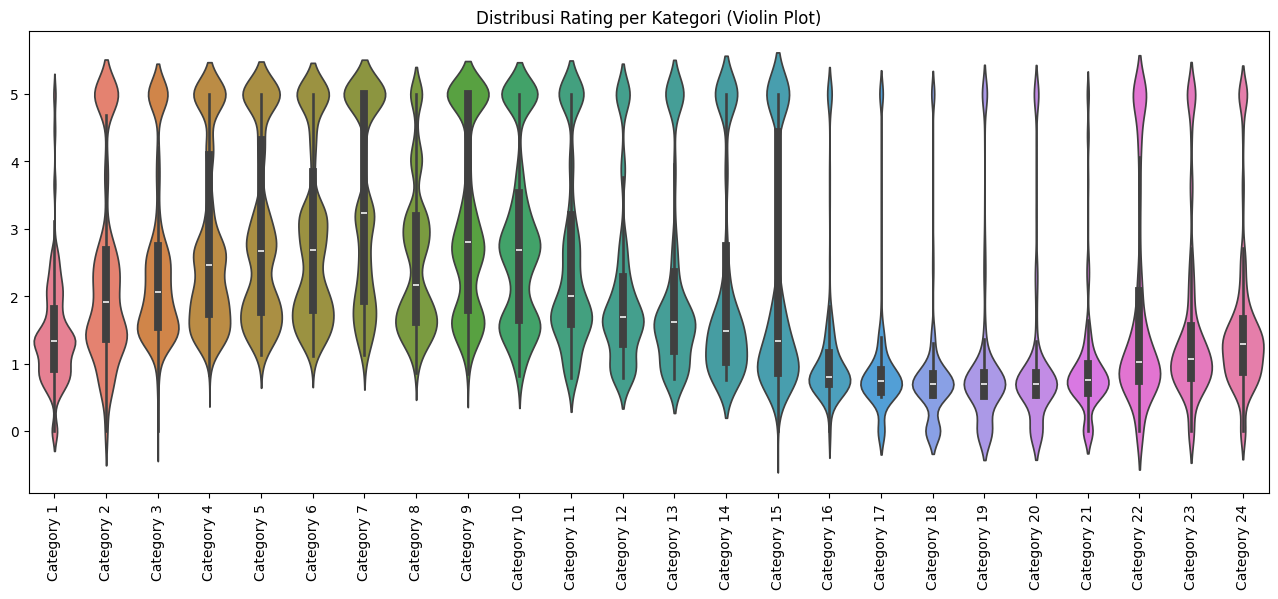

In [15]:
# 2. Visualisasi Distribusi Rating Tiap Kategori (Violin Plot)
plt.figure(figsize=(16,6))
sns.violinplot(data=rating_data[category_cols])
plt.xticks(rotation=90)
plt.title("Distribusi Rating per Kategori (Violin Plot)")
plt.show()

**Penjelasan:**

Violin plot di atas memiliki fungsi yang kurang lebih sama dengan boxplot nilai *rating* per kategori. Namun, violin plot memberikan informasi yang lebih lengkap karena menyertakan kepadatan distribusi data (data density), sehingga konsentrasi data paling tinggi pada tiap kategori dapat dilihat. Misalnya, pada kategori 1, terlihat bahwa banyak pengguna memberikan rating di kisaran 0,5 hingga 1,75. Hal ini ditunjukkan oleh bagian violin yang melebar pada interval tersebut, menandakan kepadatan data yang tinggi di rentang nilai tersebut.

Berdasarkan violin plot di atas, dapat diketahui pula bahwa terdapat beberapa kategori menunjukkan banyak pengguna memberi rating maksimum (5), yaitu kategori 4 (*parks*), 5 (*theatres*), 6 (*museums*), 7 (*malls*), dan 9 (*restaurants*). Hal ini menunjukkan bahwa kategori tersebut memiliki daya tarik yang tinggi.

### Heatmap Korelasi Antar Fitur Numerik

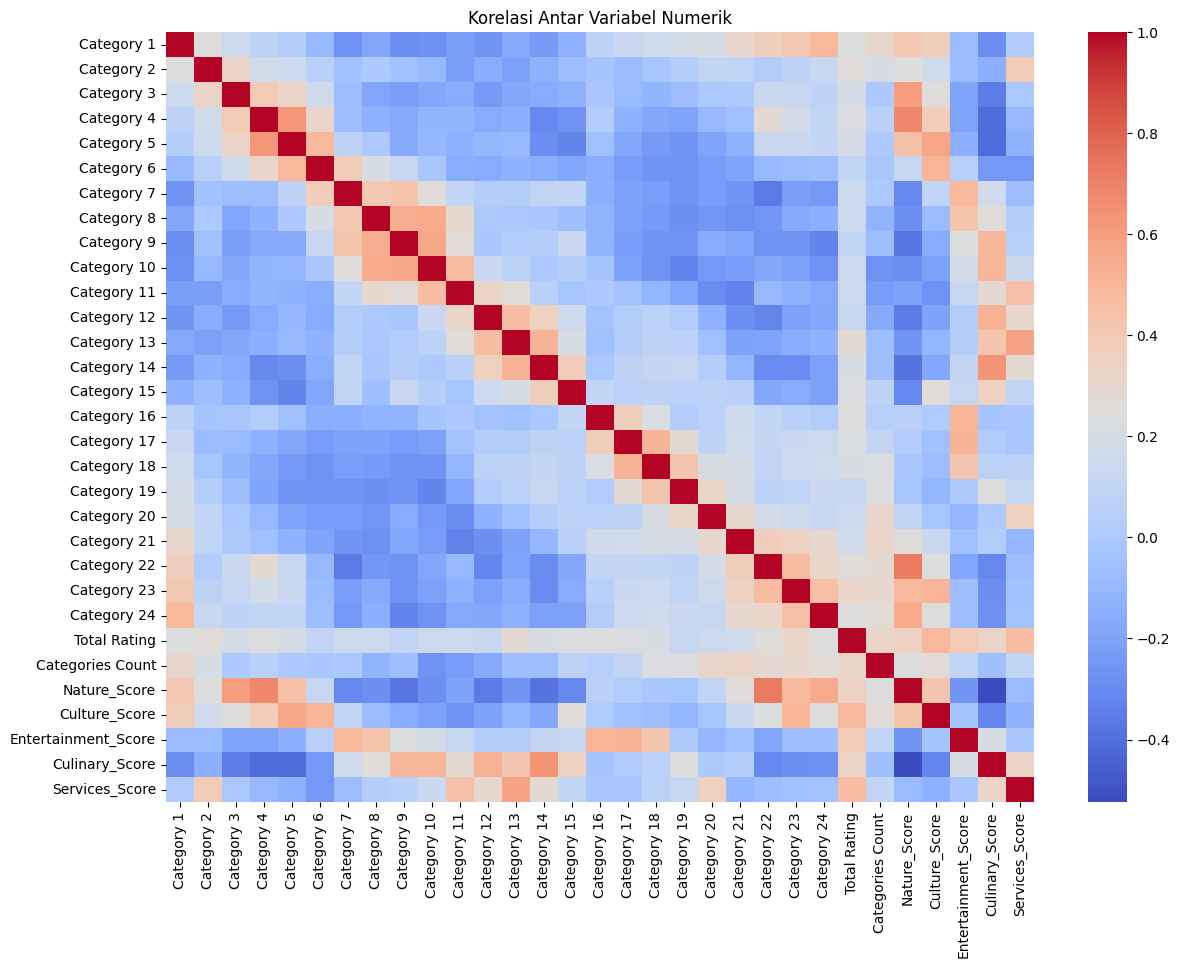

In [16]:
# 3. Heatmap Korelasi Antar Variabel Numerik
num_cols = rating_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 10))
sns.heatmap(num_cols.corr(), annot=False, cmap='coolwarm')
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

**Penjelasan:**

Heatmap di atas menunjukkan korelasi antara setiap fitur numerik yang terdapat pada dataset. Warna biru pada heatmap menunjukkan korelasi negatif, sedangkan warna merah menunjukkan korelasi positif. Semakin gelap setiap warna, semakin tinggi nilai korelasi tersebut. Pada heatmap tersebut, dapat diketahui bahwa terdapat beberapa pasang fitur yang memiliki nilai korelasi yang cukup tinggi.

Jika dua atau lebih fitur sangat berkorelasi, mereka dapat memberikan informasi yang hampir sama sehingga data menjadi redundant. Hal ini dapat memengaruhi hasil *clustering*, terutama pada algoritma berbasis jarak seperti `K-Means`, `K-Medoids`, atau `Agglomerative Clustering`. Fitur yang *redundant* dapat menyebabkan bias dalam perhitungan jarak antar data sehingga pembentukan klaster lebih dipengaruhi oleh dimensi yang memiliki korelasi kuat.

Oleh karena itu, penting untuk melakukan penanganan terhadap data. Salah satu penanganan tersebut adalah reduksi dimensi (*dimensionality reduction*), seperti menggunakan *Principal Component Analysis* (PCA), atau memilih subset fitur yang tidak terlalu berkorelasi (*feature selection*).

### Distribusi `Total Rating` (Histogram)

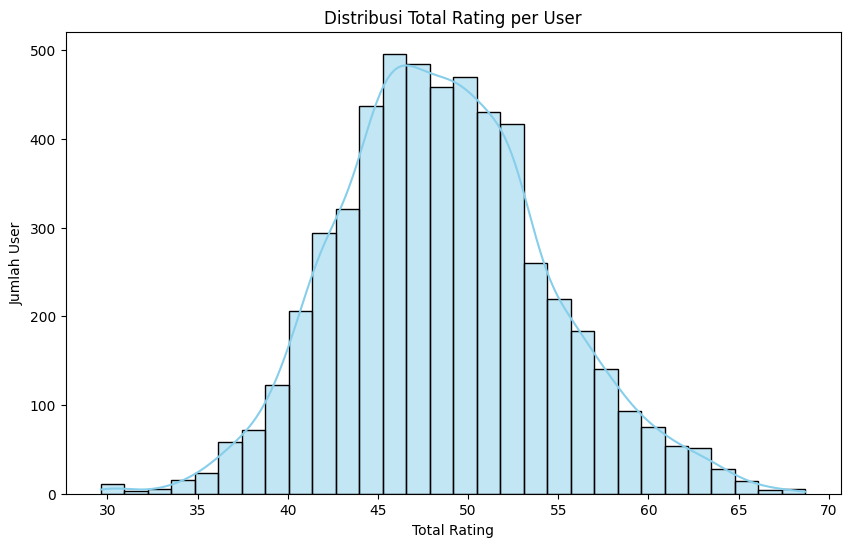

In [17]:
# 4. Distribusi Total Rating
plt.figure(figsize=(10, 6))
sns.histplot(rating_data['Total Rating'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi Total Rating per User")
plt.xlabel("Total Rating")
plt.ylabel("Jumlah User")
plt.show()

**Penjelasan:**

Visualisasi histogram untuk variabel `Total Rating` menunjukkan pola distribusi yang menyerupai distribusi normal. Hal ini terlihat dari bentuk histogram yang simetris dan berbentuk lonceng. Distribusi normal ini mengindikasikan bahwa nilai *rating* yang diberikan pengguna terhadap destinasi atau tempat wisata cenderung berkumpul pada nilai tengah, dan hanya sedikit yang memberikan rating sangat rendah maupun sangat tinggi. Hal ini juga menunjukkan bahwa data tidak memiliki bias ekstrem ke salah satu sisi.

### Pie Chart `Dominant Interest Type`

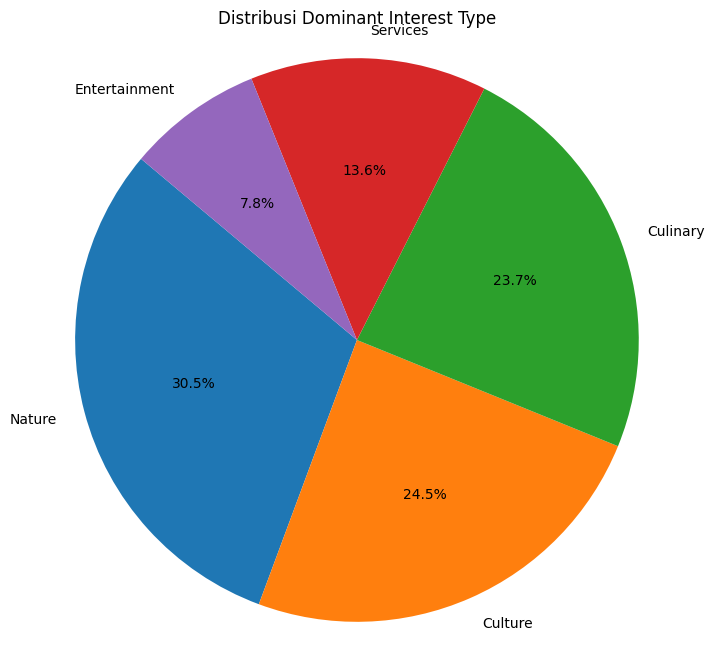

In [18]:
dominant_counts = rating_data['Dominant Interest Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dominant_counts, labels=dominant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Dominant Interest Type')
plt.axis('equal')
plt.show()

**Penjelasan:**

Diagram Pie (*Pie Chart*) di atas menunjukkan proporsi dari 5 tipe ketertarikan yang dominan antara pelanggan atau *user*. Diagram menunjukkan bahwa sebagian besar pengguna tertarik pada destinasi atau tempat wisata bertema alam (`Nature`). Destinasi lain yang tidak kalah besar proporsinya adalah destinasi budaya (`Culture`) dan kuliner (`Culinary`). Jenis destinasi yang paling tidak diminati adalah destinasi bertema hiburan (`Entertainment`) seperti mall, klub tari, kolam renang, dan lain-lain.

### Statistik Deskriptif tiap Kategori

In [19]:
# 5. Statistik Deskriptif per Kategori
desc_stats = rating_data[category_cols].describe().T
print(desc_stats[['mean', '50%', 'std', 'min', 'max']])

                 mean   50%       std   min  max
Category 1   1.456353  1.34  0.827472  0.00  5.0
Category 2   2.321123  1.91  1.421176  0.00  5.0
Category 3   2.488580  2.06  1.247208  0.00  5.0
Category 4   2.797112  2.46  1.309352  0.83  5.0
Category 5   2.958437  2.67  1.338420  1.12  5.0
Category 6   2.893300  2.68  1.281983  1.11  5.0
Category 7   3.351214  3.23  1.413100  1.12  5.0
Category 8   2.541482  2.17  1.111569  0.86  5.0
Category 9   3.127004  2.80  1.356976  0.84  5.0
Category 10  2.832352  2.68  1.307326  0.81  5.0
Category 11  2.549184  2.00  1.381390  0.78  5.0
Category 12  2.077999  1.69  1.249012  0.78  5.0
Category 13  2.125443  1.61  1.406508  0.77  5.0
Category 14  2.190083  1.49  1.576454  0.76  5.0
Category 15  2.205793  1.33  1.715881  0.00  5.0
Category 16  1.192779  0.80  1.107408  0.00  5.0
Category 17  0.949633  0.74  0.973789  0.00  5.0
Category 18  0.822060  0.69  0.946455  0.00  5.0
Category 19  0.969523  0.69  1.203125  0.00  5.0
Category 20  1.00017

**Penjelasan:**

Berdasarkan tabel statistik deskriptif, dapat dilihat bahwa skor rata-rata tertinggi terdapat pada `Category 7` dengan nilai sebesar 3.35, diikuti oleh `Kategori 9` (3.13) dan `Kategori 5` (2.96). Ini menunjukkan bahwa pengguna cenderung memberikan penilaian yang lebih tinggi pada kategori-kategori ini. Selain itu, skor median pada kategori-kategori tersebut juga tinggi yang mengindikasikan persebaran penilaian cenderung merata ke arah positif.

Sebaliknya, skor rata-rata terendah terdapat pada `Category 18` (0.82), `Category 17` (0.95), dan `Category 19` (0.97) yang menunjukkan bahwa kategori-kategori ini cenderung kurang menarik atau kurang relevan bagi pengguna. Skor minimum pada banyak kategori adalah 0.00, yang mengindikasikan bahwa terdapat destinasi yang sama sekali tidak menarik bagi pengguna.

Dari sisi sebaran data, terlihat bahwa beberapa kategori memiliki nilai standar deviasi yang tinggi, misalnya `Category 15` (1.72) dan `Category 14` (1.58). Hal ini menunjukkan adanya variasi penilaian yang cukup besar antar pengguna. Sebaliknya, `Category 16` dan `Category 21` memiliki standar deviasi yang lebih kecil, menunjukkan bahwa penilaian dari pengguna cenderung lebih konsisten.

Nilai maksimum pada seluruh kategori adalah 5.0, yang merupakan batas atas sistem `rating`. Hal ini menunjukkan bahwa setiap kategori memiliki setidaknya beberapa data yang mendapat skor tertinggi dari pengguna.

## Prepemrosesan (2)

In [20]:
# Standarisasi
num_cols = rating_data.select_dtypes(include=['float64', 'int64'])
name_numcols = num_cols.columns.tolist()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(num_cols)
data_scaled = pd.DataFrame(data_scaled, columns=name_numcols)

In [21]:
# Hot Encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
dominant_encoded = encoder.fit_transform(rating_data[['Dominant Interest Type']])
dominant_df = pd.DataFrame(dominant_encoded, columns=encoder.get_feature_names_out(['Dominant Interest Type']))

# Gabungkan data
data_scaled.reset_index(drop=True, inplace=True)
dominant_df.reset_index(drop=True, inplace=True)

clustering_data = pd.concat([data_scaled, dominant_df], axis=1)
clustering_data.head()

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
1   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
2   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
3   -1.760164   -1.281537    0.915264    0.636165    1.525493    0.020829   
4   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   

   Category 7  Category 8  Category 9  Category 10  ...  Nature_Score  \
0    1.166893   -0.172279   -0.587392    -0.147147  ...     -0.381947   
1    1.166893    0.088638   -0.587392    -0.139497  ...     -0.381947   
2    1.166893    0.088638   -0.587392    -0.147147  ...     -0.387747   
3    1.166893   -0.172279   -0.587392    -0.147147  ...     -0.387747   
4    1.166893    0.079640   -0.587392    -0.139497  ...     -0.387747   

   Culture_Score  Entertainment_Score  Culinary_Score  Services_Score  \
0      -0.490105            -0.158545       -0.996103       -1.912308   
1      -0.490105            -0.048331       -0.993069       -1.912308   
2      -0.490105            -0.048331       -0.996103       -1.912308   
3      -0.490105            -0.158545       -0.996103       -1.691781   
4      -0.490105            -0.052131       -0.993069       -1.912308   

   Dominant Interest Type_Culinary  Dominant Interest Type_Culture  \
0                              0.0                             1.0   
1                              0.0                             1.0   
2                              0.0                             1.0   
3                              0.0                             1.0   
4                              0.0                             1.0   

   Dominant Interest Type_Entertainment  Dominant Interest Type_Nature  \
0                                   0.0                            0.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   Dominant Interest Type_Services  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0  

[5 rows x 36 columns]

**Penjelasan:**

Untuk mempersiapkan data yang siap dimodelkan, dilakukan prepemrosesan kembali berupa **Standarisasi** dan ***One Hot Encoding***. Standarisasi dilakukan terhadap fitur numerik agar skala setiap fitur sama, sedangkan *one hot encoding* dilakukan terhadap fitur kategorik, yaitu `Dominant Interest Type` agar dapat mempermudah pemodelan *clustering*.

## Modelling

Pada tahap ini, akan dilakukan *modelling* dengan 2 skema sebagai berikut.

* **SKEMA 1:** *modelling* tanpa *feature selection* maupun *dimensionality reduction*.
* **SKEMA 2:** *modelling* dengan *dimensionality reduction* berupa PCA.

Untuk setiap skema, digunakan 4 algoritma *clustering* yang berbeda-beda, antara lain:
1. **K-Means**
2. **K-Medoids**
3. **Agglomerative Hierarchical Clustering**
4. **Gaussian Mixture Model**

### **SKEMA 1**

#### **K-Means**

Sebelum membentuk model, akan dilakukan pencarian $k$ paling optimal menggunakan plot *silhouette score* sebagai berikut.

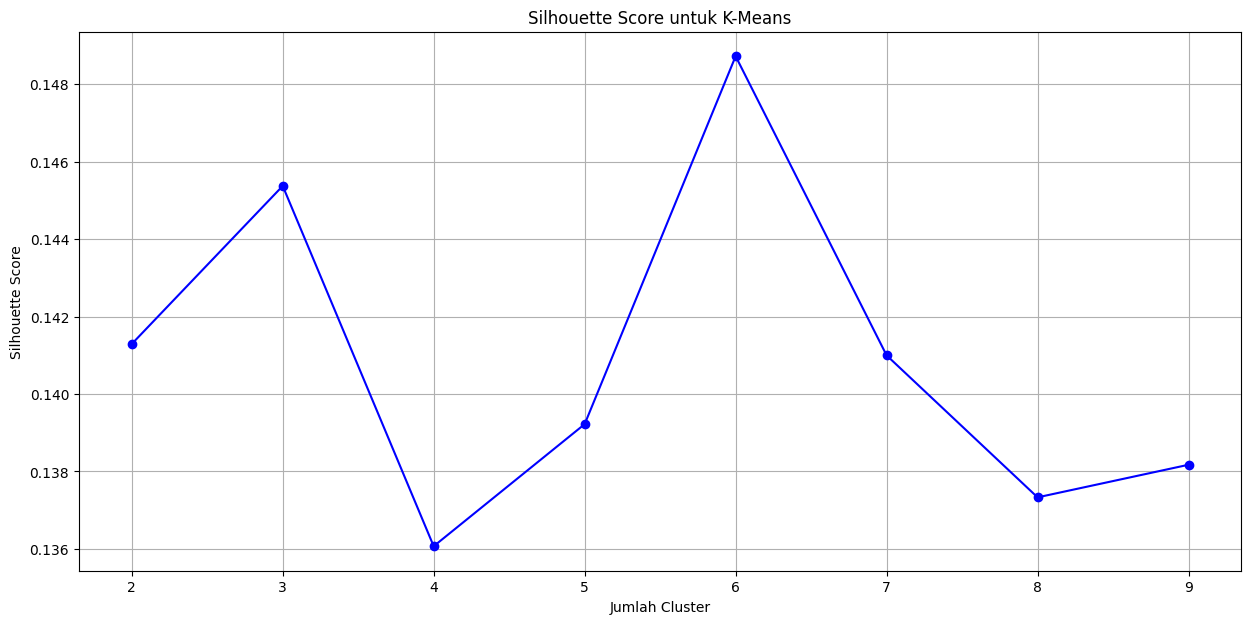

In [22]:
# K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_avg = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(clustering_data)
    silhouette = silhouette_score(clustering_data, kmeans.labels_)
    silhouette_avg.append(silhouette)

plt.figure(figsize=(15, 7))
plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk K-Means")
plt.grid()
plt.show()

**Penjelasan:**

Plot di atas menunjukkan *silhouette score* dari 8 nilai $k$ yang berbeda-beda. Berdasarkan plot, diketahui bahwa nilai $k$ atau jumlah klaster dengan *silhouette score* tertinggi adalah $k=6$ dengan nilai di atas $0.148$. Oleh karena itu, akan dilakukan *K-mean clustering* dengan jumlah klaster $= 6$.

In [ ]:
# Menampilkan hasil klustering

kmeans = KMeans(n_clusters = 6, random_state = 26)
kmeans.fit(clustering_data)

sk1_kmeans=clustering_data.copy()

sk1_kmeans['Cluster'] = kmeans.labels_
sk1_kmeans

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0      -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
1      -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
2      -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
3      -1.760164   -1.281537    0.915264    0.636165    1.525493    0.020829   
4      -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
...          ...         ...         ...         ...         ...         ...   
5446   -0.660328    1.885145    1.211954   -0.005433   -0.140804   -0.252211   
5447   -0.636156    1.885145    1.227992   -0.005433   -0.133331   -0.252211   
5448   -0.624070    1.885145    1.236010    0.002206   -0.133331   -0.252211   
5449   -0.611984    1.216623    1.252048    0.009844   -0.125859   -0.353626   
5450   -0.611984    1.230698    2.013819    0.017482   -0.118387   -0.252211   

      Category 7  Category 8  Category 9  Category 10  ...  Culture_Score  \
0       1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
1       1.166893    0.088638   -0.587392    -0.139497  ...      -0.490105   
2       1.166893    0.088638   -0.587392    -0.147147  ...      -0.490105   
3       1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
4       1.166893    0.079640   -0.587392    -0.139497  ...      -0.490105   
...          ...         ...         ...          ...  ...            ...   
5446   -0.651970   -1.305915   -1.000112    -1.371132  ...       1.840887   
5447   -1.119071   -1.323909   -1.007482    -1.386431  ...       0.397723   
5448   -1.133226   -1.341904   -1.014852    -1.401731  ...       0.394186   
5449   -1.126148   -1.359898   -1.022222    -1.417031  ...       1.816127   
5450   -0.659047   -1.368895   -1.022222    -1.432331  ...       0.397723   

      Entertainment_Score  Culinary_Score  Services_Score  \
0               -0.158545       -0.996103       -1.912308   
1               -0.048331       -0.993069       -1.912308   
2               -0.048331       -0.996103       -1.912308   
3               -0.158545       -0.996103       -1.691781   
4               -0.052131       -0.993069       -1.912308   
...                   ...             ...             ...   
5446            -1.279689       -1.596903        1.795033   
5447            -1.549523       -1.342018        0.376174   
5448            -1.572326       -1.624212        1.695172   
5449            -1.579927       -1.639384        1.283245   
5450            -1.340497       -1.648487        1.262441   

      Dominant Interest Type_Culinary  Dominant Interest Type_Culture  \
0                                 0.0                             1.0   
1                                 0.0                             1.0   
2                                 0.0                             1.0   
3                                 0.0                             1.0   
4                                 0.0                             1.0   
...                               ...                             ...   
5446                              0.0                             0.0   
5447                              0.0                             0.0   
5448                              0.0                             0.0   
5449                              0.0                             0.0   
5450                              0.0                             0.0   

      Dominant Interest Type_Entertainment  Dominant Interest Type_Nature  \
0                                      0.0                            0.0   
1                                      0.0                            0.0   
2                                      0.0                            0.0   
3                                      0.0                            0.0   
4                                      0.0                            0.0   
...                                    ...      

<Axes: xlabel='PC_1', ylabel='PC_2'>

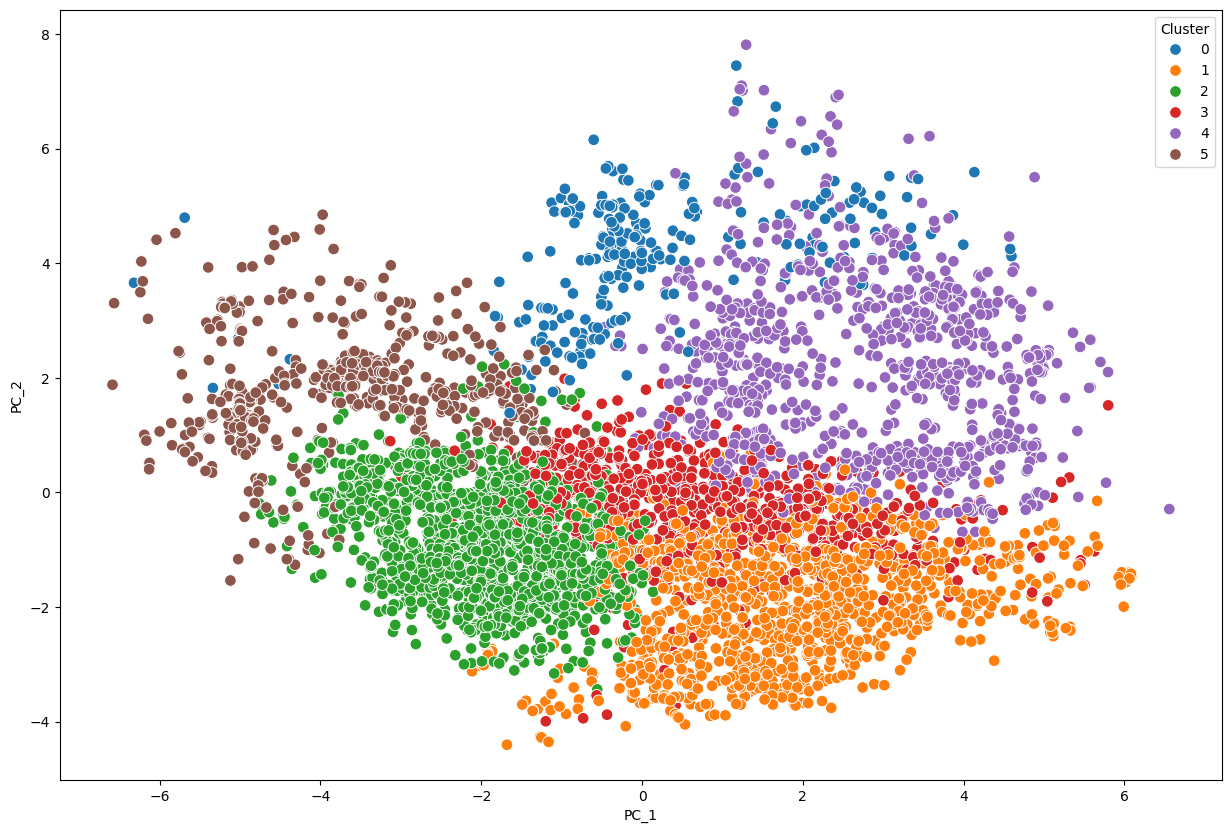

In [ ]:
# Visualisasi hasil clustering dengan PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
sk1_pca1 = pd.DataFrame(pca.fit_transform(sk1_kmeans.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = sk1_kmeans.index)

sk1_pca1 = pd.concat([sk1_pca1, sk1_kmeans.Cluster], axis = 1)

import seaborn as sb

custom_palette = { 0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b' }

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=sk1_pca1, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *clustering k-means* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 6 klaster, yang ditunjukkan dengan 6 warna yang berbeda.

Dari plot tersebut, terlihat bahwa sebagian besar data dalam setiap klaster cenderung membentuk kelompok yang cukup jelas dan terpisah. Namun, masih terdapat beberapa titik data yang saling tumpang tindih atau berada di antara dua klaster, yang menunjukkan bahwa batas antarklaster tidak sepenuhnya tegas. Hal ini bisa terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

#### **K-Medoids**

Sama seperti metode *k-means*, akan dibentuk plot *silhouette score* untuk mengetahui nilai $k$ yang paling optimal.

K=2, Silhouette Score=0.1358
K=3, Silhouette Score=0.1158
K=4, Silhouette Score=0.0971
K=5, Silhouette Score=0.0955
K=6, Silhouette Score=0.0983
K=7, Silhouette Score=0.0913
K=8, Silhouette Score=0.0769
K=9, Silhouette Score=0.0804


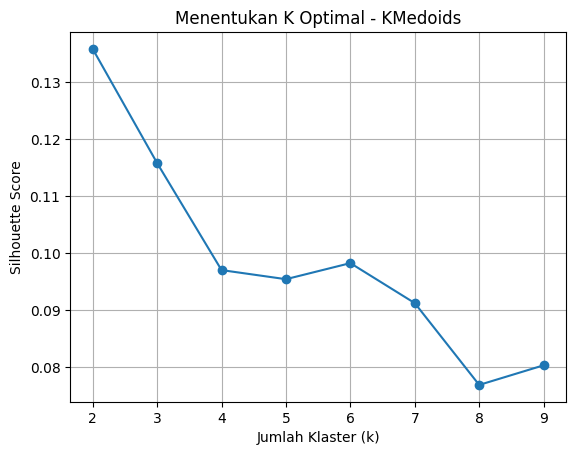

In [24]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Contoh data
X = clustering_data.values

# Mencoba berbagai nilai k
silhouette_scores = []
K_range = range(2, 10)  # Uji dari k=2 sampai k=9

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    kmedoids.fit(X)
    labels = kmedoids.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Visualisasi skor silhouette
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.title("Menentukan K Optimal - KMedoids")
plt.grid(True)
plt.show()

**Penjelasan:**

Berdasarkan plot di atas, diketahui bahwa nilai $k$ dengan *silhouette score* tertinggi adalah $k=2$ dengan nilai di atas $0.13$. Dengan ini, *k-medoids clustering* dapat dilakukan dengan jumlah klaster $=2$.

In [ ]:
# Menampilkan hasil clustering

model_kmed = KMedoids(n_clusters=2, random_state=42, metric='euclidean')
model_kmed.fit(X)

sk1_kmed=clustering_data.copy()
sk1_kmed['Cluster'] = model_kmed.labels_
sk1_kmed

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0      -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
1      -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
2      -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
3      -1.760164   -1.281537    0.915264    0.636165    1.525493    0.020829   
4      -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
...          ...         ...         ...         ...         ...         ...   
5446   -0.660328    1.885145    1.211954   -0.005433   -0.140804   -0.252211   
5447   -0.636156    1.885145    1.227992   -0.005433   -0.133331   -0.252211   
5448   -0.624070    1.885145    1.236010    0.002206   -0.133331   -0.252211   
5449   -0.611984    1.216623    1.252048    0.009844   -0.125859   -0.353626   
5450   -0.611984    1.230698    2.013819    0.017482   -0.118387   -0.252211   

      Category 7  Category 8  Category 9  Category 10  ...  Culture_Score  \
0       1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
1       1.166893    0.088638   -0.587392    -0.139497  ...      -0.490105   
2       1.166893    0.088638   -0.587392    -0.147147  ...      -0.490105   
3       1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
4       1.166893    0.079640   -0.587392    -0.139497  ...      -0.490105   
...          ...         ...         ...          ...  ...            ...   
5446   -0.651970   -1.305915   -1.000112    -1.371132  ...       1.840887   
5447   -1.119071   -1.323909   -1.007482    -1.386431  ...       0.397723   
5448   -1.133226   -1.341904   -1.014852    -1.401731  ...       0.394186   
5449   -1.126148   -1.359898   -1.022222    -1.417031  ...       1.816127   
5450   -0.659047   -1.368895   -1.022222    -1.432331  ...       0.397723   

      Entertainment_Score  Culinary_Score  Services_Score  \
0               -0.158545       -0.996103       -1.912308   
1               -0.048331       -0.993069       -1.912308   
2               -0.048331       -0.996103       -1.912308   
3               -0.158545       -0.996103       -1.691781   
4               -0.052131       -0.993069       -1.912308   
...                   ...             ...             ...   
5446            -1.279689       -1.596903        1.795033   
5447            -1.549523       -1.342018        0.376174   
5448            -1.572326       -1.624212        1.695172   
5449            -1.579927       -1.639384        1.283245   
5450            -1.340497       -1.648487        1.262441   

      Dominant Interest Type_Culinary  Dominant Interest Type_Culture  \
0                                 0.0                             1.0   
1                                 0.0                             1.0   
2                                 0.0                             1.0   
3                                 0.0                             1.0   
4                                 0.0                             1.0   
...                               ...                             ...   
5446                              0.0                             0.0   
5447                              0.0                             0.0   
5448                              0.0                             0.0   
5449                              0.0                             0.0   
5450                              0.0                             0.0   

      Dominant Interest Type_Entertainment  Dominant Interest Type_Nature  \
0                                      0.0                            0.0   
1                                      0.0                            0.0   
2                                      0.0                            0.0   
3                                      0.0                            0.0   
4                                      0.0                            0.0   
...                                    ...      

<Axes: xlabel='PC_1', ylabel='PC_2'>

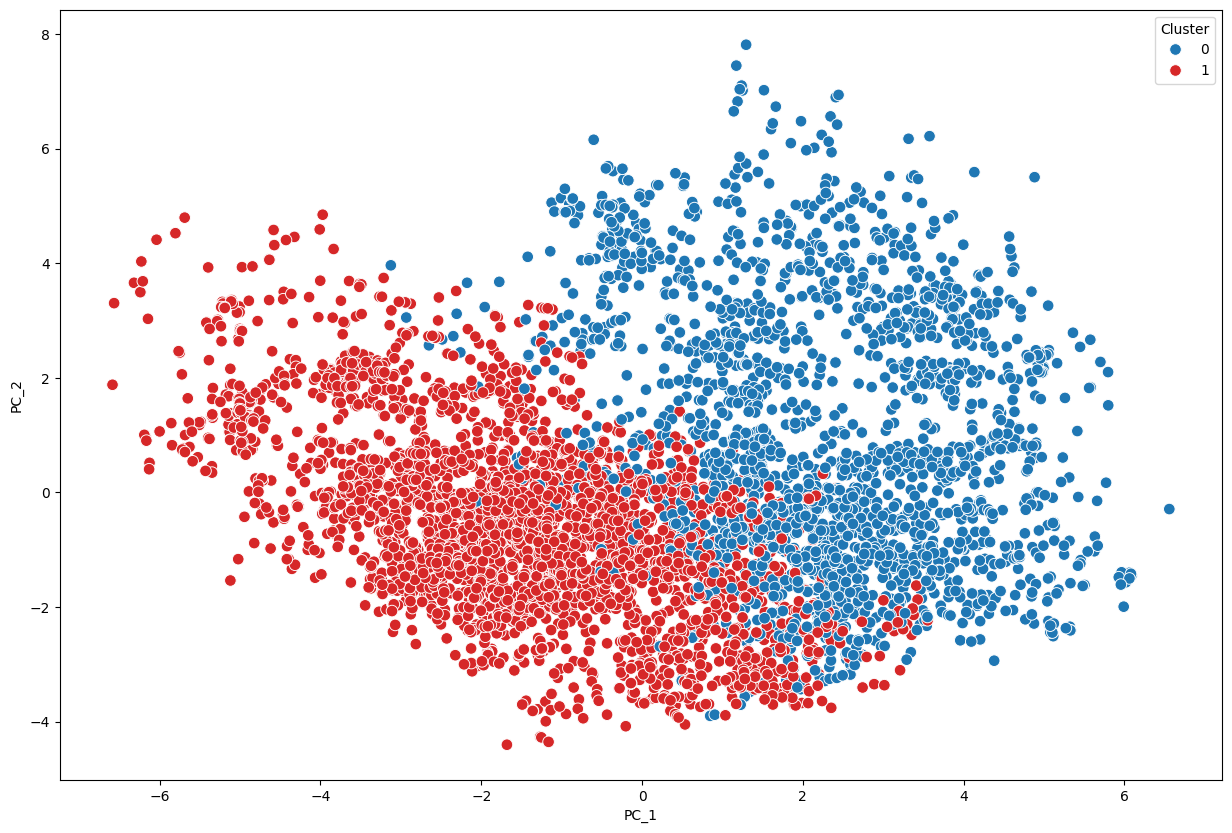

In [27]:
# Visualisasi dengan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
kmed_pca = pd.DataFrame(pca.fit_transform(sk1_kmed.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = sk1_kmed.index)

kmed_pca = pd.concat([kmed_pca, sk1_kmed.Cluster], axis = 1)

import seaborn as sb

custom_palette = { 0: '#1f77b4', 1: '#d62728' }

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=kmed_pca, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *clustering k-medoids* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 2 klaster, yang ditunjukkan dengan 2 warna yang berbeda (merah dan biru).

Dari plot tersebut, terlihat bahwa sebagian besar data dalam setiap klaster cenderung membentuk kelompok yang cukup jelas dan terpisah. Namun, masih terdapat beberapa titik data yang saling tumpang tindih di bagian tengah plot. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

#### **Agglomerative Hierarchical Clustering**

Untuk membentuk model *agglomerative hierarchal clustering* dan optimal, nilai $k$ atau jumlah klaster juga harus optimal. Oleh karena itu, dibentuk plot *silhouette score* untuk mengetahui nilai $k$ yang paling optimal.

k=2, silhouette score=0.1252
k=3, silhouette score=0.1273
k=4, silhouette score=0.1220
k=5, silhouette score=0.1307
k=6, silhouette score=0.1315
k=7, silhouette score=0.1183
k=8, silhouette score=0.1132
k=9, silhouette score=0.1066
k=10, silhouette score=0.1120


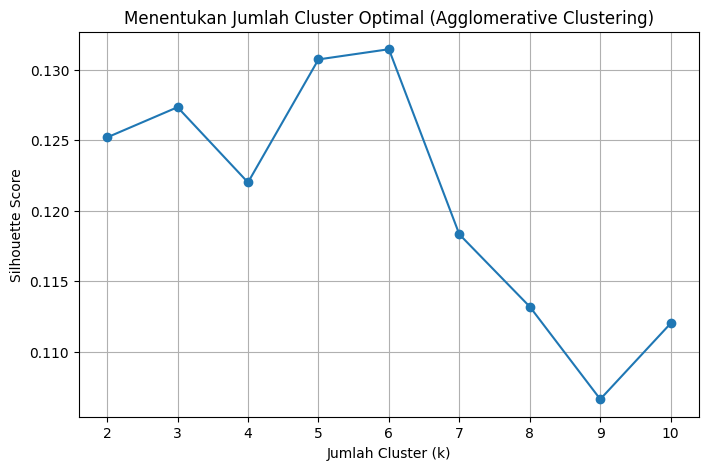

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

sk1_agglo = clustering_data.copy()# Pastikan hanya data numerik

X = sk1_agglo.select_dtypes(include='number').values

# Uji berbagai jumlah cluster
silhouette_scores = []
ks = range(2, 11)  # dari 2 hingga 10 cluster

for k in ks:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'k={k}, silhouette score={score:.4f}')

# Plot hasilnya
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Menentukan Jumlah Cluster Optimal (Agglomerative Clustering)')
plt.grid(True)
plt.show()

**Penjelasan:**

Plot di atas menunjukkan *silhouette score* dari setiap jumlah klaster ($k$) yang berbeda-beda dari rentang $k=2$ hingga $k=10$. Berdasarkan plot tersebut, dapat diketahui bahwa jumlah klaster yang paling optimal dengan *silhouette score* tertinggi adalah $k=6$. Oleh karena itu, akan dilakukan *agglomerative clustering* dengan jumlah klaster tersebut.

In [ ]:
# Menampilkan hasil klaster dengan k = 6

agglo = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
labels = agglo.fit_predict(sk1_agglo)
sk1_agglo['Cluster'] = labels

sk1_agglo.head()

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
1   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
2   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
3   -1.760164   -1.281537    0.915264    0.636165    1.525493    0.020829   
4   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   

   Category 7  Category 8  Category 9  Category 10  ...  Culture_Score  \
0    1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
1    1.166893    0.088638   -0.587392    -0.139497  ...      -0.490105   
2    1.166893    0.088638   -0.587392    -0.147147  ...      -0.490105   
3    1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
4    1.166893    0.079640   -0.587392    -0.139497  ...      -0.490105   

   Entertainment_Score  Culinary_Score  Services_Score  \
0            -0.158545       -0.996103       -1.912308   
1            -0.048331       -0.993069       -1.912308   
2            -0.048331       -0.996103       -1.912308   
3            -0.158545       -0.996103       -1.691781   
4            -0.052131       -0.993069       -1.912308   

   Dominant Interest Type_Culinary  Dominant Interest Type_Culture  \
0                              0.0                             1.0   
1                              0.0                             1.0   
2                              0.0                             1.0   
3                              0.0                             1.0   
4                              0.0                             1.0   

   Dominant Interest Type_Entertainment  Dominant Interest Type_Nature  \
0                                   0.0                            0.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   Dominant Interest Type_Services  Cluster  
0                              0.0        1  
1                              0.0        1  
2                              0.0        1  
3                              0.0        1  
4                              0.0        1  

[5 rows x 37 columns]

<Axes: xlabel='PC_1', ylabel='PC_2'>

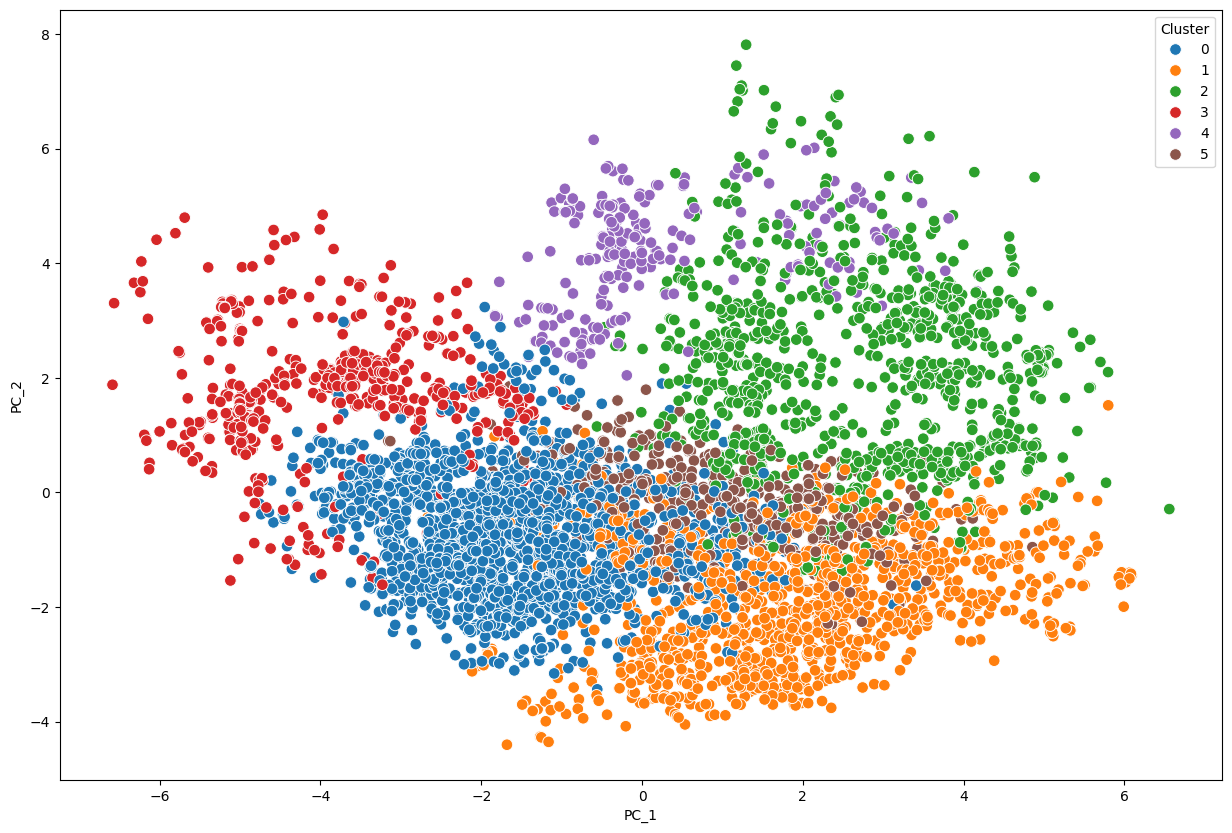

In [36]:
# Visualisasi dengan PCA

X_features = sk1_agglo.drop(columns=['Cluster'])
y_labels = sk1_agglo['Cluster']

# PCA to 2 components
pca = PCA(n_components=2)
sk1_pca3 = pd.DataFrame(pca.fit_transform(X_features),
                      columns=['PC_1', 'PC_2'],
                      index=sk1_agglo.index)

# Gabungkan hasil PCA dan label cluster
sk1_pca3['Cluster'] = y_labels

import seaborn as sb

custom_palette = { 0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b' }

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=sk1_pca3, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *clustering k-medoids* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 2 klaster, yang ditunjukkan dengan 2 warna yang berbeda (merah dan biru).

Dari plot tersebut, terlihat bahwa sebagian besar data dalam setiap klaster cenderung membentuk kelompok yang cukup jelas dan terpisah. Namun, masih terdapat beberapa titik data yang saling tumpang tindih di bagian tengah plot, terutama di data klaster 5. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

#### **Gaussian Mixture Model (GMM)**

Sebelumnya menjalankan *clustering*, akan divisualisasikan *scree plot* yang berisi *silhouette score* di setiap jumlah klaster. Hal ini dilakukan untuk mencari jumlah klaster $k$ yang paling optimal dengan *silhouette score* tertinggi.

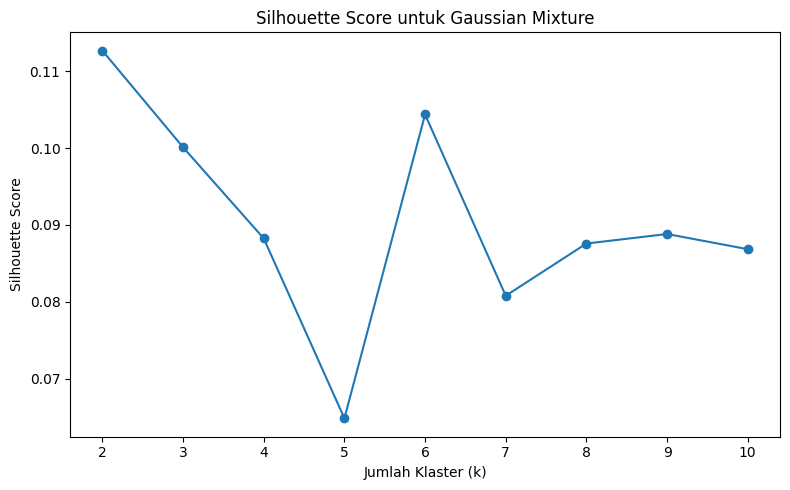

In [104]:
# Menentukan n_component dengan silhouette score

from sklearn.mixture import GaussianMixture

sil_scores = []

for n in range(2, 11):
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(clustering_data)
    score = silhouette_score(clustering_data, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Gaussian Mixture')
plt.tight_layout()
plt.show()

**Penjelasan:**

*Scree plot* di atas menunjukkan *silhouette score* berdasarkan jumlah klaster $k$. Dapat dilihat bahwa jumlah klaster dengan *silhouette score* tertinggi adalah $k=2$. Oleh karena itu, *modelling* untuk *clustering* akan dilakukan dengan $k=2$.

In [ ]:
# Hasil clustering

sk1_gmm = clustering_data.copy()

gmm = GaussianMixture(n_components = 2)
gmm.fit(sk1_gmm)
sk1_gmm['Cluster'] = gmm.predict(sk1_gmm)

print(sk1_gmm.Cluster.value_counts())
sk1_gmm.head(10)

Cluster
0    2941
1    2510
Name: count, dtype: int64


Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
1   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
2   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
3   -1.760164   -1.281537    0.915264    0.636165    1.525493    0.020829   
4   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
5   -1.760164    1.885145    0.915264    0.636165    1.525493    0.020829   
6   -1.760164    1.885145    0.915264    0.636165    1.525493    0.020829   
7   -1.760164    1.885145    0.923283    0.643803    1.525493    0.020829   
8   -1.760164    1.885145    0.923283    0.643803    1.525493    0.020829   
9   -1.760164   -1.260426    0.931302    0.666717    1.525493    0.020829   

   Category 7  Category 8  Category 9  Category 10  ...  Culture_Score  \
0    1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
1    1.166893    0.088638   -0.587392    -0.139497  ...      -0.490105   
2    1.166893    0.088638   -0.587392    -0.147147  ...      -0.490105   
3    1.166893   -0.172279   -0.587392    -0.147147  ...      -0.490105   
4    1.166893    0.079640   -0.587392    -0.139497  ...      -0.490105   
5   -0.227333   -0.172279   -0.587392    -0.147147  ...      -0.486568   
6    1.166893    0.079640   -0.587392    -0.147147  ...      -0.490105   
7   -0.227333    0.070643   -0.594762    -0.154797  ...      -0.840285   
8    1.166893   -0.172279   -0.594762    -0.154797  ...      -0.843822   
9    1.166893    0.061646   -0.594762    -0.154797  ...      -0.843822   

   Entertainment_Score  Culinary_Score  Services_Score  \
0            -0.158545       -0.996103       -1.912308   
1            -0.048331       -0.993069       -1.912308   
2            -0.048331       -0.996103       -1.912308   
3            -0.158545       -0.996103       -1.691781   
4            -0.052131       -0.993069       -1.912308   
5            -0.907241       -1.002172        0.176452   
6            -0.048331       -1.002172        0.163970   
7            -0.990852       -1.014309        0.163970   
8            -0.348569       -1.166027        0.151487   
9            -0.249756       -1.172095       -1.716746   

   Dominant Interest Type_Culinary  Dominant Interest Type_Culture  \
0                              0.0                             1.0   
1                              0.0                             1.0   
2                              0.0                             1.0   
3                              0.0                             1.0   
4                              0.0                             1.0   
5                              0.0                             0.0   
6                              0.0                             0.0   
7                              0.0                             0.0   
8                              0.0                             0.0   
9                              0.0                             0.0   

   Dominant Interest Type_Entertainment  Dominant Interest Type_Nature  \
0                                   0.0                            0.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   
5                                   0.0                            0.0   
6                                   0.0                            0.0   
7                                   0.0                            0.0   
8                                   0.0                            0.0   
9                                   0.0                            1.0   

   Dominant Interest Type_Services  Cluster  
0                              0.0        0  
1                      

In [42]:
# Dapatkan peluang setiap titik data
prob = gmm.predict_proba(clustering_data)

sk1_gmm2 = sk1_gmm.copy()
# Tambahkan kolom peluang
for i in range(prob.shape[1]):
    sk1_gmm2[f'cluster_{i}_probability'] = prob[:, i]

sk1_gmm2.head(10)

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
1   -1.760164   -1.633391    0.915264    0.651441    1.525493    0.020829   
2   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
3   -1.760164   -1.281537    0.915264    0.636165    1.525493    0.020829   
4   -1.760164   -1.633391    0.915264    0.636165    1.525493    0.020829   
5   -1.760164    1.885145    0.915264    0.636165    1.525493    0.020829   
6   -1.760164    1.885145    0.915264    0.636165    1.525493    0.020829   
7   -1.760164    1.885145    0.923283    0.643803    1.525493    0.020829   
8   -1.760164    1.885145    0.923283    0.643803    1.525493    0.020829   
9   -1.760164   -1.260426    0.931302    0.666717    1.525493    0.020829   

   Category 7  Category 8  Category 9  Category 10  ...  Culinary_Score  \
0    1.166893   -0.172279   -0.587392    -0.147147  ...       -0.996103   
1    1.166893    0.088638   -0.587392    -0.139497  ...       -0.993069   
2    1.166893    0.088638   -0.587392    -0.147147  ...       -0.996103   
3    1.166893   -0.172279   -0.587392    -0.147147  ...       -0.996103   
4    1.166893    0.079640   -0.587392    -0.139497  ...       -0.993069   
5   -0.227333   -0.172279   -0.587392    -0.147147  ...       -1.002172   
6    1.166893    0.079640   -0.587392    -0.147147  ...       -1.002172   
7   -0.227333    0.070643   -0.594762    -0.154797  ...       -1.014309   
8    1.166893   -0.172279   -0.594762    -0.154797  ...       -1.166027   
9    1.166893    0.061646   -0.594762    -0.154797  ...       -1.172095   

   Services_Score  Dominant Interest Type_Culinary  \
0       -1.912308                              0.0   
1       -1.912308                              0.0   
2       -1.912308                              0.0   
3       -1.691781                              0.0   
4       -1.912308                              0.0   
5        0.176452                              0.0   
6        0.163970                              0.0   
7        0.163970                              0.0   
8        0.151487                              0.0   
9       -1.716746                              0.0   

   Dominant Interest Type_Culture  Dominant Interest Type_Entertainment  \
0                             1.0                                   0.0   
1                             1.0                                   0.0   
2                             1.0                                   0.0   
3                             1.0                                   0.0   
4                             1.0                                   0.0   
5                             0.0                                   0.0   
6                             0.0                                   0.0   
7                             0.0                                   0.0   
8                             0.0                                   0.0   
9                             0.0                                   0.0   

   Dominant Interest Type_Nature  Dominant Interest Type_Services  Cluster  \
0                            0.0                              0.0        0   
1                            0.0                              0.0        0   
2                            0.0                              0.0        0   
3                            0.0                              0.0        0   
4                            0.0                              0.0        0   
5                            0.0                              1.0        0   
6                            0.0                              1.0        0   
7                            0.0                              1.0        0   
8                            0.0                              1.0        0   
9                            1.0                              0.0        1   

   cluster_0_probability  cluster_1_probability  

**Penjelasan:**

Dengan menambahkan kolom peluang pada data, dapat diketahui bahwa *Gaussian* menentukan klaster pada setiap observasinya berdasarkan peluang tertinggi pada setiap klaster. Misalnya, pada baris observasi pertama, peluang data tersebut merupakan klaster 1 sangat kecil, bahkan mendekati 0. Peluang data tersebut merupakan klaster 0 mendekati 1 (*output* menunjukkan angka 1 karena kemungkinan sudah dibulatkan). Oleh karena itu, baris observasi pertama merupakan bagian dari klaster 0.

<Axes: xlabel='PC_1', ylabel='PC_2'>

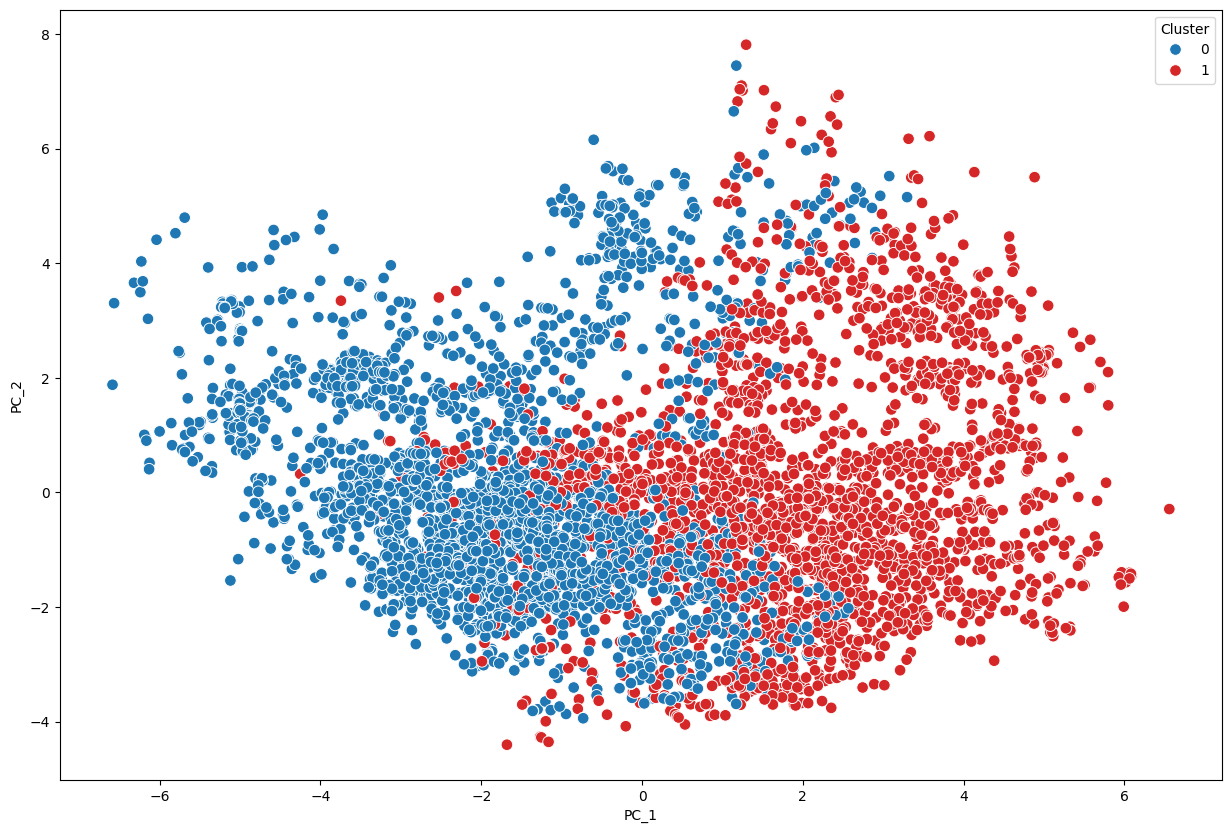

In [41]:
# Visualisasi dengan PCA

pca = PCA(n_components = 2)
sk1_pca4 = pd.DataFrame(pca.fit_transform(sk1_gmm.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = sk1_gmm.index)

sk1_pca4 = pd.concat([sk1_pca4, sk1_gmm.Cluster], axis = 1)

import seaborn as sb

custom_palette = { 0: '#1f77b4', 1: '#d62728' }

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=sk1_pca4, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *clustering Gaussian Mixture* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 2 klaster, yang ditunjukkan dengan 2 warna yang berbeda (merah dan biru).

Dari plot tersebut, terlihat bahwa data pada kedua klaster masih cenderung tumpang tindih. Meskipun terlihat bahwa klaster 0 berada di sebelah kiri dan klaster 1 berada di sebelah kanan, masih terdapat beberapa data klaster 1 yang terpisah jauh dan tumpang tindih di sebelah kiri. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

### **SKEMA 2**

Pada skema 2, dilakukan *dimentional reduction* berupa ***Principal Component Analysis* (PCA)** untuk fitur numerik dan ***Multiple Correspondence Analysis* (MCA)** untuk fitur kategorik yang sudah diubah ke bentuk *one hot encode*.

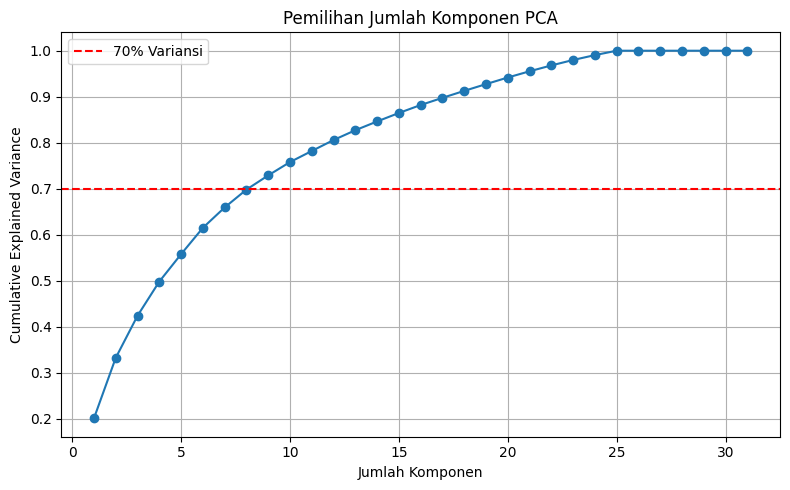

In [23]:
# Fit PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
clustering_pca = pca.fit_transform(data_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% Variansi')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.title('Pemilihan Jumlah Komponen PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Penjelasan:**

Setelah melakukan *fit* PCA terhadap fitur numerik yang sudah distandarisasi sebelumnya (`data_scaled`), ditampilkan plot untuk mengetahui jumlah komponen paling optimal yang dapat menjelaskan setidaknya 70% dari variansi data. Berdasarkan plot di atas, dapat diketahui bahwa jumlah komponen $> 8$ merupakan komponen yang dapat memenuhi hal tersebut. Oleh karena itu, pada skema 2, akan dilakukan PCA dengan jumlah komponen $= 9$.

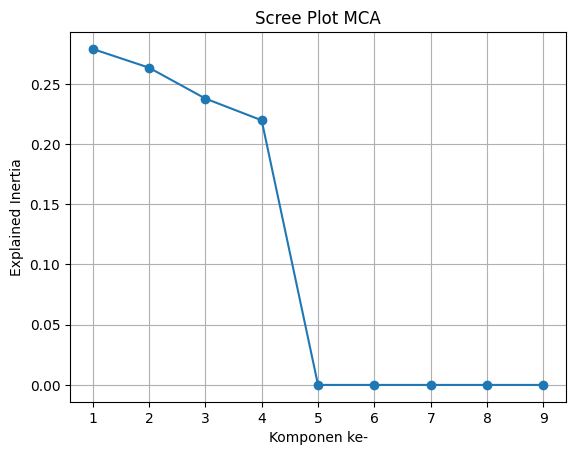

In [24]:
# Fit MCA

import prince

mca = prince.MCA(n_components=20, random_state=42)
mca = mca.fit(dominant_df)

# Lihat proporsi variansi per komponen
eig_vals = mca.eigenvalues_
total = eig_vals.sum()
explained = eig_vals / total

plt.plot(range(1, len(explained) + 1), explained, marker='o')
plt.xlabel('Komponen ke-')
plt.ylabel('Explained Inertia')
plt.title('Scree Plot MCA')
plt.grid(True)
plt.show()

**Penjelasan:**

Dilakukan pula *fit* MCA dan dilakukan perbandingan menggunakan plot untuk mengetahui jumlah komponen yang paling utama. Pada MCA, jumlah komponen yang paling optimal adalah komponen terakhir sebelum nilai *explained inertia* turun secara drastis sehingga penurunan selanjutnya tidak signifikan. Berdasarkan plot di atas, *explained inertia* turun secara dratis pada jumlah komponen ke-5. Oleh karena itu, jumlah komponen yang paling optimal untuk MCA adalah **4 komponen**.

In [25]:
# PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(data_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(9)])

# MCA
mca = prince.MCA(n_components=4, random_state=42, engine='sklearn')
X_mca = mca.fit_transform(dominant_df)
X_mca.columns = ['MCA1', 'MCA2', 'MCA 3', 'MCA 4']

# Menggabungkan data hasil PCA dan MCA
clustering_pca = pd.concat([X_pca, X_mca], axis=1)
clustering_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.374855 -3.722438 -3.165742  0.355136 -2.378040  1.431972 -0.006117   
1 -1.433974 -3.754701 -3.045895  0.450911 -2.324823  1.446876  0.026748   
2 -1.436845 -3.751074 -3.053306  0.454225 -2.326599  1.443096  0.027224   
3 -1.274407 -3.589402 -2.904388  0.254725 -2.275253  1.206099  0.246614   
4 -1.437527 -3.751579 -3.054685  0.452154 -2.322258  1.444706  0.025697   

        PC8       PC9     MCA1      MCA2     MCA 3     MCA 4  
0  0.958974 -0.169734 -0.47358 -0.710876 -0.272655 -0.099911  
1  0.907763 -0.173152 -0.47358 -0.710876 -0.272655 -0.099911  
2  0.902490 -0.166957 -0.47358 -0.710876 -0.272655 -0.099911  
3  0.857651 -0.187508 -0.47358 -0.710876 -0.272655 -0.099911  
4  0.906626 -0.166373 -0.47358 -0.710876 -0.272655 -0.099911

**Penjelasan:**

Telah dilakukan PCA dan MCA untuk data sehingga *modelling clustering* skema 2 dapat dilakukan dengan 4 metode yang sama dengan skema 1, yaitu *k-means*, *k-medoids*, *agglomerative hierarchical clustering*, dan *gaussian mixture model*.

#### **K-Means**

Sama seperti skema 1, diperlukan visualisasi berupa *scree plot* untuk mengetahui jumlah klaster $k$ yang paling optimal melalui *silhouette score* tertinggi.

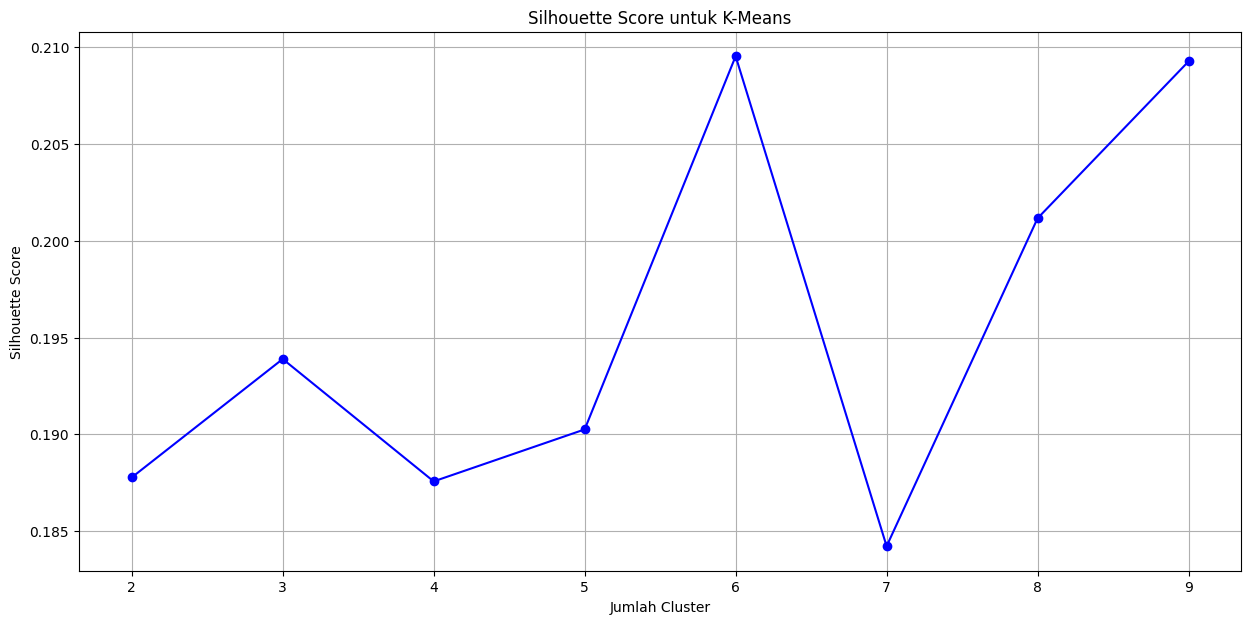

In [26]:
# K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_avg = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(clustering_pca)
    silhouette = silhouette_score(clustering_pca, kmeans.labels_)
    silhouette_avg.append(silhouette)

plt.figure(figsize=(15, 7))
plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk K-Means")
plt.grid()
plt.show()

**Penjelasan:**

*Scree plot* di atas menunjukkan *silhouette score* dari *k-means clustering* berdasarkan jumlah klasternya. Sekilas, plot tersebut menunjukkan bahwa *silhouette score* menghasilkan nilai tertinggi pada jumlah klaster 6 dan 9. Namun, ketika dilihat lebih jelas, jumlah klaster $=6$ menghasilkan titik yang lebih tinggi dari jumlah klaster $=9$. Oleh karena itu, akan digunakan jumlah klaster $k=6$ untuk *k-means clustering* pada skema 2.

In [27]:
kmeans = KMeans(n_clusters = 6, random_state = 26)
kmeans.fit(clustering_pca)

sk2_kmeans=clustering_pca.copy()

sk2_kmeans['Cluster'] = kmeans.labels_
sk2_kmeans

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.374855 -3.722438 -3.165742  0.355136 -2.378040  1.431972 -0.006117   
1    -1.433974 -3.754701 -3.045895  0.450911 -2.324823  1.446876  0.026748   
2    -1.436845 -3.751074 -3.053306  0.454225 -2.326599  1.443096  0.027224   
3    -1.274407 -3.589402 -2.904388  0.254725 -2.275253  1.206099  0.246614   
4    -1.437527 -3.751579 -3.054685  0.452154 -2.322258  1.444706  0.025697   
...        ...       ...       ...       ...       ...       ...       ...   
5446  4.393814  1.284602  0.815273 -2.138357  0.259475 -2.222697  0.580060   
5447  4.110009  0.298403 -1.192630 -1.535338  0.578754 -0.661245  0.616291   
5448  4.388417  0.953299 -0.739804 -2.250020  1.142294 -1.319948  1.519365   
5449  4.435918  1.198340  0.010946 -1.999966  0.195137 -2.134605  0.107869   
5450  4.573470  0.707227 -0.663110 -1.938420  0.880904 -1.184734  1.340653   

           PC8       PC9      MCA1      MCA2     MCA 3     MCA 4  Cluster  
0     0.958974 -0.169734 -0.473580 -0.710876 -0.272655 -0.099911        5  
1     0.907763 -0.173152 -0.473580 -0.710876 -0.272655 -0.099911        5  
2     0.902490 -0.166957 -0.473580 -0.710876 -0.272655 -0.099911        5  
3     0.857651 -0.187508 -0.473580 -0.710876 -0.272655 -0.099911        5  
4     0.906626 -0.166373 -0.473580 -0.710876 -0.272655 -0.099911        5  
...        ...       ...       ...       ...       ...       ...      ...  
5446  1.444963  0.424572  0.776921 -0.043781 -0.148586 -0.066564        3  
5447  0.396689 -0.147736  0.776921 -0.043781 -0.148586 -0.066564        3  
5448  0.659540 -0.707448  0.776921 -0.043781 -0.148586 -0.066564        3  
5449  1.693251  0.248159  0.776921 -0.043781 -0.148586 -0.066564        3  
5450  0.839272 -0.950914  0.776921 -0.043781 -0.148586 -0.066564        3  

[5451 rows x 14 columns]

<Axes: xlabel='PC_1', ylabel='PC_2'>

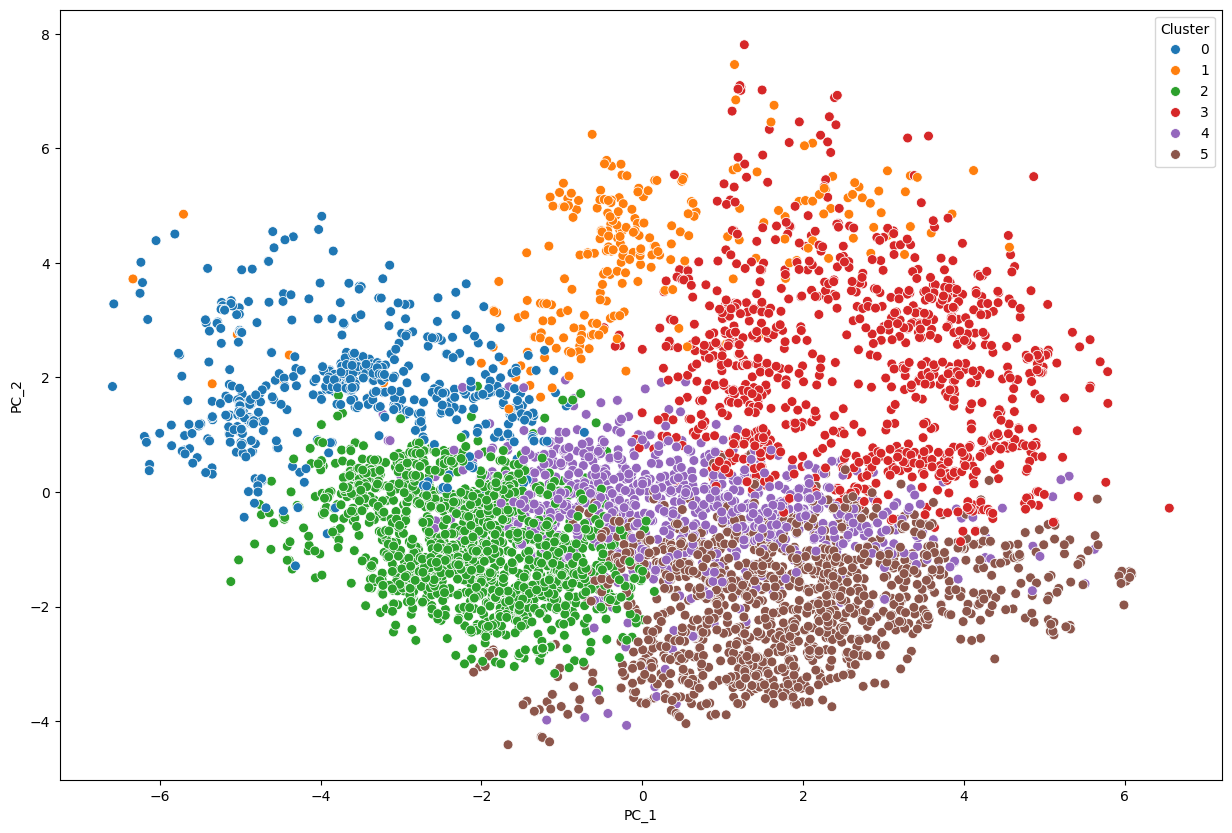

In [28]:
# Visualisasi Clustering

pca = PCA(n_components = 2)
sk2_pca1 = pd.DataFrame(pca.fit_transform(sk2_kmeans.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = sk2_kmeans.index)

sk2_pca1 = pd.concat([sk2_pca1, sk2_kmeans.Cluster], axis = 1)

import seaborn as sb

custom_palette = {
    0: '#1f77b4',  # Biru
    1: '#ff7f0e',  # Oranye
    2: '#2ca02c',  # Hijau
    3: '#d62728',  # Merah
    4: '#9467bd',  # Ungu
    5: '#8c564b',  # Cokelat
    6: '#e377c2',  # Pink
    7: '#7f7f7f',  # Abu-abu
    8: '#bcbd22'   # Kuning kehijauan
}

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=sk2_pca1, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=50, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *k-means clustering* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 6 klaster, yang ditunjukkan dengan 6 warna yang berbeda.

Dari plot tersebut, terlihat bahwa data pada keenam klaster sudah cukup terpisah walaupun masih cenderung tumpang tindih. Beberapa data klaster 1 (oranye) masih tumpang tindih dengan data klaster 0 (biru). Kemudian, data klaster 4 (ungu) juga masih tumpang tindih dengan data klaster lainnya. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

#### **K-Medoids**

K=2, Silhouette Score=0.1519
K=3, Silhouette Score=0.1190
K=4, Silhouette Score=0.1657
K=5, Silhouette Score=0.1736
K=6, Silhouette Score=0.1700
K=7, Silhouette Score=0.1717
K=8, Silhouette Score=0.1538
K=9, Silhouette Score=0.1626


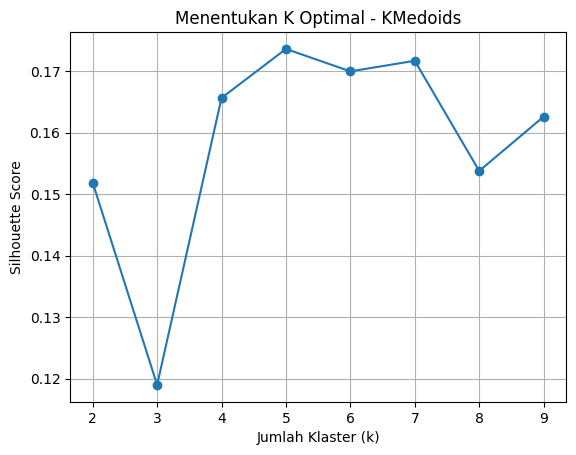

In [88]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Contoh data
X = clustering_pca.values

# Mencoba berbagai nilai k
silhouette_scores = []
K_range = range(2, 10)  # Uji dari k=2 sampai k=9

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    kmedoids.fit(X)
    labels = kmedoids.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Visualisasi skor silhouette
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.title("Menentukan K Optimal - KMedoids")
plt.grid(True)
plt.show()

**Penjelasan:**

Untuk mengoptimalkan kinerja model *clustering*, jumlah klaster $k$ optimal yang dapat memaksimalkan *silhouette score* perlu dicari. Hal ini dapat dilakukan dengan visualisasi *scree plot*, seperti yang telah ditampilkan di atas. Plot di atas menunjukkan bahwa nilai $k$ yang dapat memaksimalkan *silhouette score* adalah $k = 5$. Oleh karena itu, nilai $k$ ini akan digunakan untuk *k-medoids clustering* skema 2.

In [ ]:
# Hasil clustering

model_kmed = KMedoids(n_clusters=5, random_state=42, metric='euclidean')
model_kmed.fit(X)

sk2_kmed=clustering_pca.copy()
sk2_kmed['Cluster'] = model_kmed.labels_
sk2_kmed

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.374855 -3.722438 -3.165742  0.355136 -2.378040  1.431972 -0.006117   
1    -1.433974 -3.754701 -3.045895  0.450911 -2.324823  1.446876  0.026748   
2    -1.436845 -3.751074 -3.053306  0.454225 -2.326599  1.443096  0.027224   
3    -1.274407 -3.589402 -2.904388  0.254725 -2.275253  1.206099  0.246614   
4    -1.437527 -3.751579 -3.054685  0.452154 -2.322258  1.444706  0.025697   
...        ...       ...       ...       ...       ...       ...       ...   
5446  4.393814  1.284602  0.815273 -2.138357  0.259475 -2.222697  0.580060   
5447  4.110009  0.298403 -1.192630 -1.535338  0.578754 -0.661245  0.616291   
5448  4.388417  0.953299 -0.739804 -2.250020  1.142294 -1.319948  1.519365   
5449  4.435918  1.198340  0.010946 -1.999966  0.195137 -2.134605  0.107869   
5450  4.573470  0.707227 -0.663110 -1.938420  0.880904 -1.184734  1.340653   

           PC8       PC9      MCA1      MCA2     MCA 3     MCA 4  Cluster  
0     0.958974 -0.169734 -0.473580 -0.710876 -0.272655 -0.099911        4  
1     0.907763 -0.173152 -0.473580 -0.710876 -0.272655 -0.099911        4  
2     0.902490 -0.166957 -0.473580 -0.710876 -0.272655 -0.099911        4  
3     0.857651 -0.187508 -0.473580 -0.710876 -0.272655 -0.099911        4  
4     0.906626 -0.166373 -0.473580 -0.710876 -0.272655 -0.099911        4  
...        ...       ...       ...       ...       ...       ...      ...  
5446  1.444963  0.424572  0.776921 -0.043781 -0.148586 -0.066564        2  
5447  0.396689 -0.147736  0.776921 -0.043781 -0.148586 -0.066564        2  
5448  0.659540 -0.707448  0.776921 -0.043781 -0.148586 -0.066564        2  
5449  1.693251  0.248159  0.776921 -0.043781 -0.148586 -0.066564        2  
5450  0.839272 -0.950914  0.776921 -0.043781 -0.148586 -0.066564        2  

[5451 rows x 14 columns]

<Axes: xlabel='PC_1', ylabel='PC_2'>

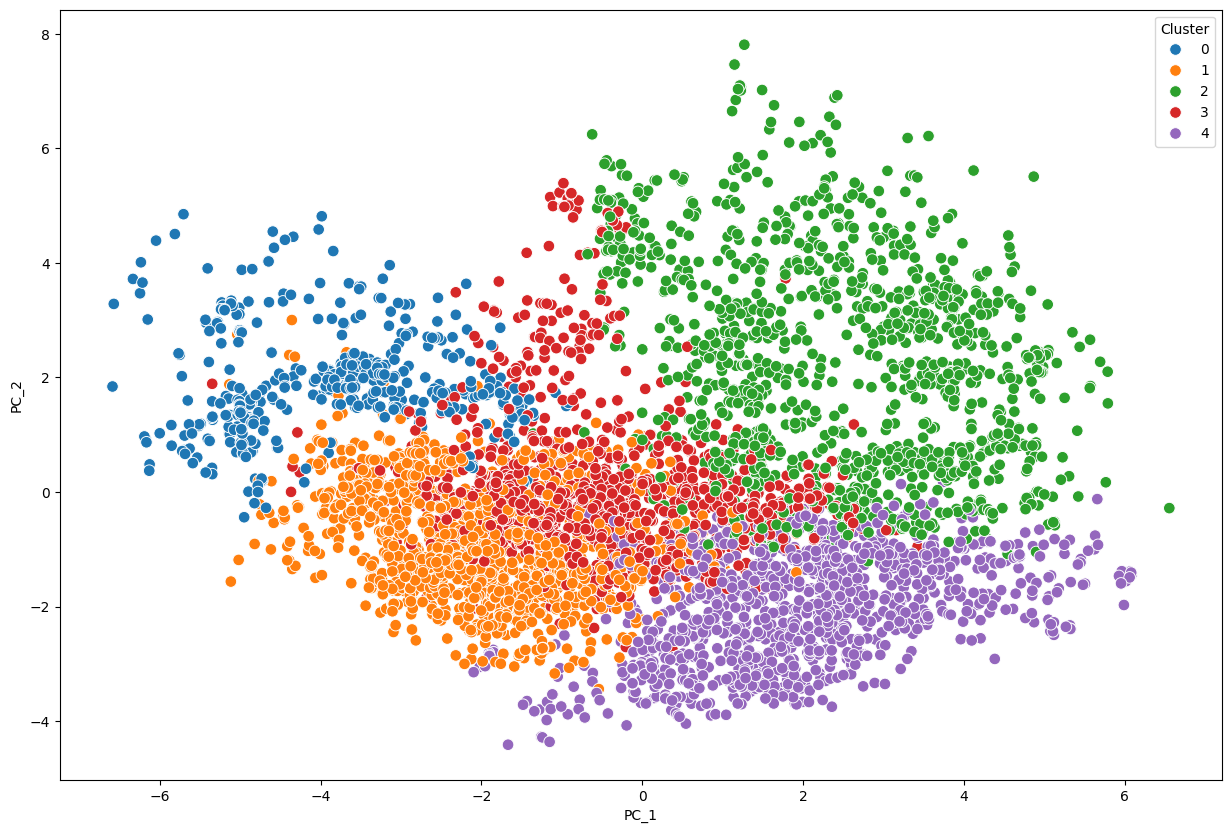

In [91]:
# Visualisasi dengan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
kmed_pca = pd.DataFrame(pca.fit_transform(sk2_kmed.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = sk2_kmed.index)

kmed_pca = pd.concat([kmed_pca, sk2_kmed.Cluster], axis = 1)

import seaborn as sb

custom_palette = { 0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd' }

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=kmed_pca, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *k-means clustering* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 5 klaster, yang ditunjukkan dengan 5 warna yang berbeda.

Dari plot tersebut, terlihat bahwa data pada kelima klaster sudah cukup terpisah walaupun masih cenderung tumpang tindih, terutama di bagian tengah. Terlihat bahwa data klaster 1 (oranye) dan 3 (merah) masih tumpang tindih dengan data klaster lainnya. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

#### **Agglomerative Hierarchical Clustering**

k=2, silhouette score=0.1368
k=3, silhouette score=0.1165
k=4, silhouette score=0.1353
k=5, silhouette score=0.1633
k=6, silhouette score=0.1751
k=7, silhouette score=0.1497
k=8, silhouette score=0.1402
k=9, silhouette score=0.1342
k=10, silhouette score=0.1380


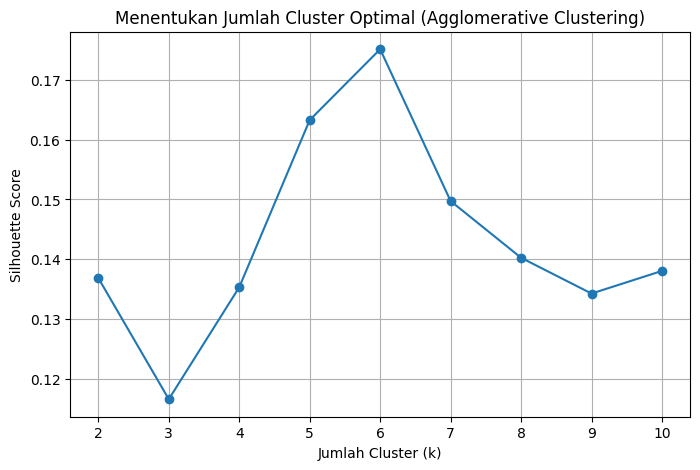

In [92]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

sk2_agglo = clustering_pca.copy()

X = sk1_agglo.select_dtypes(include='number').values

# Uji berbagai jumlah cluster
silhouette_scores = []
ks = range(2, 11)  # dari 2 hingga 10 cluster

for k in ks:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'k={k}, silhouette score={score:.4f}')

# Plot hasilnya
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Menentukan Jumlah Cluster Optimal (Agglomerative Clustering)')
plt.grid(True)
plt.show()

**Penjelasan:**

Untuk mengoptimalkan kinerja model *clustering*, jumlah klaster $k$ optimal yang dapat memaksimalkan *silhouette score* perlu dicari. Hal ini dapat dilakukan dengan visualisasi *scree plot*, seperti yang telah ditampilkan di atas. Plot di atas menunjukkan bahwa nilai $k$ yang dapat memaksimalkan *silhouette score* adalah $k = 6$. Oleh karena itu, nilai $k$ ini akan digunakan untuk *agglomerative hierarchical clustering* skema 2.

In [93]:
agglo = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
labels = agglo.fit_predict(sk1_agglo)
sk2_agglo['Cluster'] = labels
sk2_agglo.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.374855 -3.722438 -3.165742  0.355136 -2.378040  1.431972 -0.006117   
1 -1.433974 -3.754701 -3.045895  0.450911 -2.324823  1.446876  0.026748   
2 -1.436845 -3.751074 -3.053306  0.454225 -2.326599  1.443096  0.027224   
3 -1.274407 -3.589402 -2.904388  0.254725 -2.275253  1.206099  0.246614   
4 -1.437527 -3.751579 -3.054685  0.452154 -2.322258  1.444706  0.025697   

        PC8       PC9     MCA1      MCA2     MCA 3     MCA 4  Cluster  
0  0.958974 -0.169734 -0.47358 -0.710876 -0.272655 -0.099911        2  
1  0.907763 -0.173152 -0.47358 -0.710876 -0.272655 -0.099911        2  
2  0.902490 -0.166957 -0.47358 -0.710876 -0.272655 -0.099911        2  
3  0.857651 -0.187508 -0.47358 -0.710876 -0.272655 -0.099911        2  
4  0.906626 -0.166373 -0.47358 -0.710876 -0.272655 -0.099911        2

<Axes: xlabel='PC_1', ylabel='PC_2'>

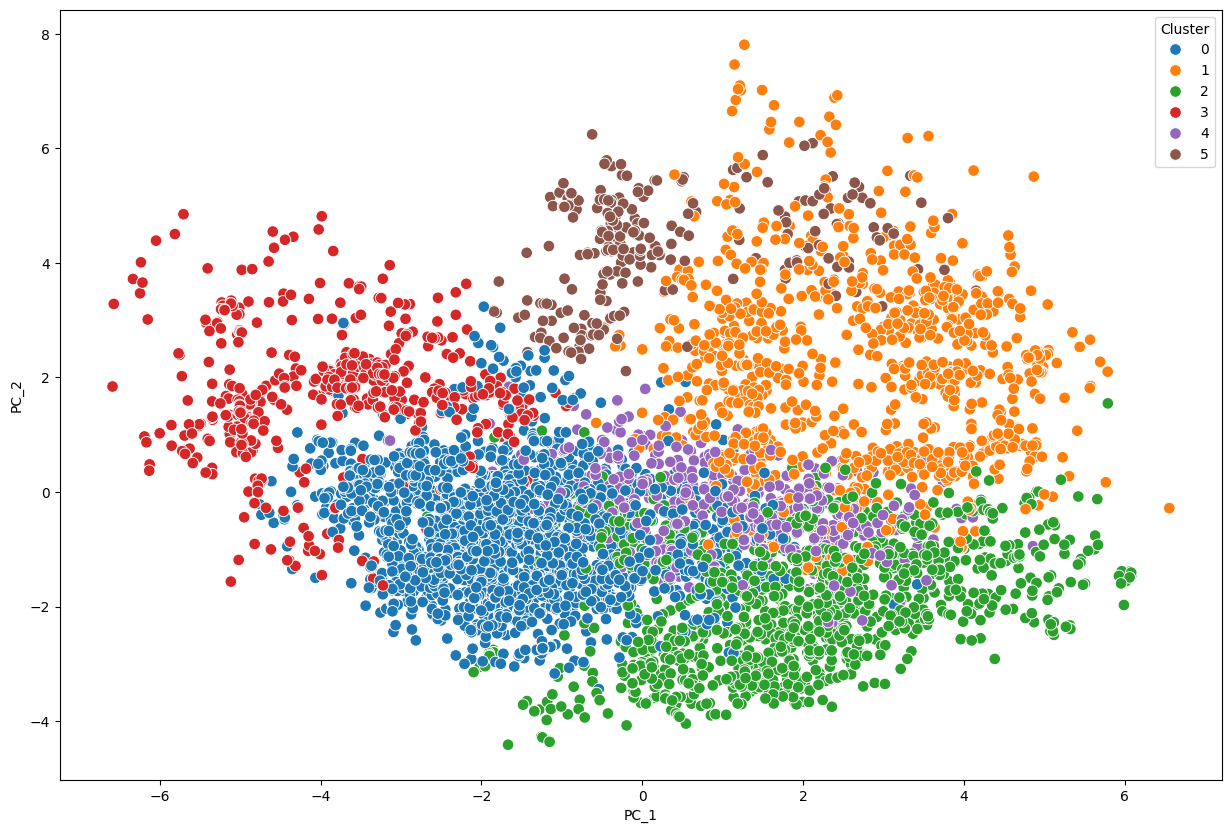

In [94]:
# Visualisasi dengan PCA

X_features = sk2_agglo.drop(columns=['Cluster'])
y_labels = sk2_agglo['Cluster']

# PCA to 2 components
pca = PCA(n_components=2)
sk2_pca3 = pd.DataFrame(pca.fit_transform(X_features),
                      columns=['PC_1', 'PC_2'],
                      index=sk2_agglo.index)

# Gabungkan hasil PCA dan label cluster
sk2_pca3['Cluster'] = y_labels

import seaborn as sb

custom_palette = { 0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b' }

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=sk2_pca3, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *agglomerative clustering* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 6 klaster, yang ditunjukkan dengan 6 warna yang berbeda.

Dari plot tersebut, terlihat bahwa data pada keenam klaster masih cenderung tumpang tindih satu sama lain. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

#### **Gaussian Mixture Model**

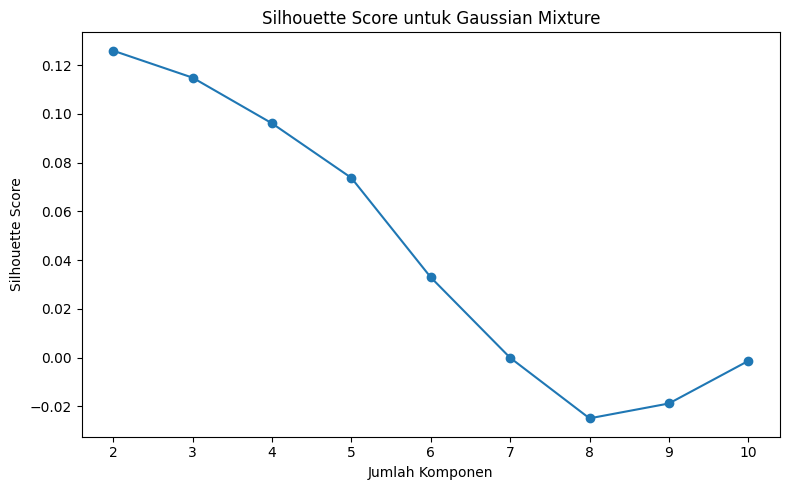

In [95]:
# Menentukan n_component dengan silhouette score

from sklearn.mixture import GaussianMixture

sil_scores = []

for n in range(2, 11):
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(clustering_pca)
    score = silhouette_score(clustering_pca, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Gaussian Mixture')
plt.tight_layout()
plt.show()

**Penjelasan:**

Untuk mengoptimalkan kinerja model *clustering*, jumlah klaster $k$ optimal yang dapat memaksimalkan *silhouette score* perlu dicari. Hal ini dapat dilakukan dengan visualisasi *scree plot*, seperti yang telah ditampilkan di atas. Plot di atas menunjukkan bahwa nilai $k$ yang dapat memaksimalkan *silhouette score* adalah $k = 2$. Oleh karena itu, nilai $k$ ini akan digunakan untuk *gaussian mixture clustering* skema 2.

In [96]:
sk2_gmm = clustering_pca.copy()

gmm = GaussianMixture(n_components = 2)
gmm.fit(sk2_gmm)
sk2_gmm['Cluster'] = gmm.predict(sk2_gmm)

print(sk2_gmm.Cluster.value_counts())
sk2_gmm

Cluster
1    3736
0    1715
Name: count, dtype: int64


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.374855 -3.722438 -3.165742  0.355136 -2.378040  1.431972 -0.006117   
1    -1.433974 -3.754701 -3.045895  0.450911 -2.324823  1.446876  0.026748   
2    -1.436845 -3.751074 -3.053306  0.454225 -2.326599  1.443096  0.027224   
3    -1.274407 -3.589402 -2.904388  0.254725 -2.275253  1.206099  0.246614   
4    -1.437527 -3.751579 -3.054685  0.452154 -2.322258  1.444706  0.025697   
...        ...       ...       ...       ...       ...       ...       ...   
5446  4.393814  1.284602  0.815273 -2.138357  0.259475 -2.222697  0.580060   
5447  4.110009  0.298403 -1.192630 -1.535338  0.578754 -0.661245  0.616291   
5448  4.388417  0.953299 -0.739804 -2.250020  1.142294 -1.319948  1.519365   
5449  4.435918  1.198340  0.010946 -1.999966  0.195137 -2.134605  0.107869   
5450  4.573470  0.707227 -0.663110 -1.938420  0.880904 -1.184734  1.340653   

           PC8       PC9      MCA1      MCA2     MCA 3     MCA 4  Cluster  
0     0.958974 -0.169734 -0.473580 -0.710876 -0.272655 -0.099911        1  
1     0.907763 -0.173152 -0.473580 -0.710876 -0.272655 -0.099911        1  
2     0.902490 -0.166957 -0.473580 -0.710876 -0.272655 -0.099911        1  
3     0.857651 -0.187508 -0.473580 -0.710876 -0.272655 -0.099911        1  
4     0.906626 -0.166373 -0.473580 -0.710876 -0.272655 -0.099911        1  
...        ...       ...       ...       ...       ...       ...      ...  
5446  1.444963  0.424572  0.776921 -0.043781 -0.148586 -0.066564        1  
5447  0.396689 -0.147736  0.776921 -0.043781 -0.148586 -0.066564        1  
5448  0.659540 -0.707448  0.776921 -0.043781 -0.148586 -0.066564        1  
5449  1.693251  0.248159  0.776921 -0.043781 -0.148586 -0.066564        1  
5450  0.839272 -0.950914  0.776921 -0.043781 -0.148586 -0.066564        1  

[5451 rows x 14 columns]

**Penjelasan:**

Berdasarkan *output* di atas, diketahui bahwa klaster terbagi menjadi 2, yaitu klaster 0 dan klaster 1. Klaster 1 memiliki 3736 observasi, sedangkan klaster 0 memiliki 1715 observasi.

In [97]:
# Dapatkan peluang setiap titik data
prob = gmm.predict_proba(clustering_pca)

sk2_gmm2 = sk2_gmm.copy()
# Tambahkan kolom peluang
for i in range(prob.shape[1]):
    sk2_gmm2[f'cluster_{i}_probability'] = prob[:, i]

sk2_gmm2

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.374855 -3.722438 -3.165742  0.355136 -2.378040  1.431972 -0.006117   
1    -1.433974 -3.754701 -3.045895  0.450911 -2.324823  1.446876  0.026748   
2    -1.436845 -3.751074 -3.053306  0.454225 -2.326599  1.443096  0.027224   
3    -1.274407 -3.589402 -2.904388  0.254725 -2.275253  1.206099  0.246614   
4    -1.437527 -3.751579 -3.054685  0.452154 -2.322258  1.444706  0.025697   
...        ...       ...       ...       ...       ...       ...       ...   
5446  4.393814  1.284602  0.815273 -2.138357  0.259475 -2.222697  0.580060   
5447  4.110009  0.298403 -1.192630 -1.535338  0.578754 -0.661245  0.616291   
5448  4.388417  0.953299 -0.739804 -2.250020  1.142294 -1.319948  1.519365   
5449  4.435918  1.198340  0.010946 -1.999966  0.195137 -2.134605  0.107869   
5450  4.573470  0.707227 -0.663110 -1.938420  0.880904 -1.184734  1.340653   

           PC8       PC9      MCA1      MCA2     MCA 3     MCA 4  Cluster  \
0     0.958974 -0.169734 -0.473580 -0.710876 -0.272655 -0.099911        1   
1     0.907763 -0.173152 -0.473580 -0.710876 -0.272655 -0.099911        1   
2     0.902490 -0.166957 -0.473580 -0.710876 -0.272655 -0.099911        1   
3     0.857651 -0.187508 -0.473580 -0.710876 -0.272655 -0.099911        1   
4     0.906626 -0.166373 -0.473580 -0.710876 -0.272655 -0.099911        1   
...        ...       ...       ...       ...       ...       ...      ...   
5446  1.444963  0.424572  0.776921 -0.043781 -0.148586 -0.066564        1   
5447  0.396689 -0.147736  0.776921 -0.043781 -0.148586 -0.066564        1   
5448  0.659540 -0.707448  0.776921 -0.043781 -0.148586 -0.066564        1   
5449  1.693251  0.248159  0.776921 -0.043781 -0.148586 -0.066564        1   
5450  0.839272 -0.950914  0.776921 -0.043781 -0.148586 -0.066564        1   

      cluster_0_probability  cluster_1_probability  
0                       0.0                    1.0  
1                       0.0                    1.0  
2                       0.0                    1.0  
3                       0.0                    1.0  
4                       0.0                    1.0  
...                     ...                    ...  
5446                    0.0                    1.0  
5447                    0.0                    1.0  
5448                    0.0                    1.0  
5449                    0.0                    1.0  
5450                    0.0                    1.0  

[5451 rows x 16 columns]

<Axes: xlabel='PC_1', ylabel='PC_2'>

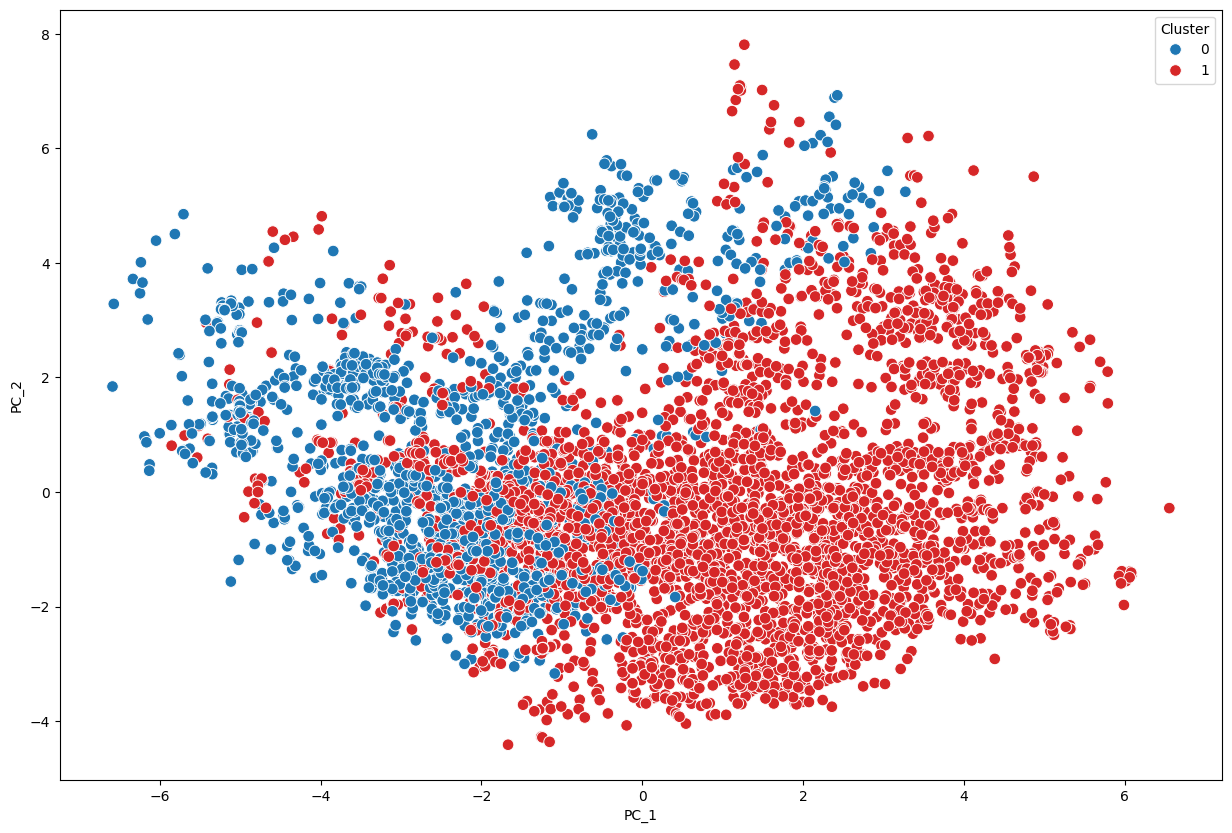

In [99]:
# Visualisasi dengan PCA

pca = PCA(n_components = 2)
sk2_pca4 = pd.DataFrame(pca.fit_transform(sk2_gmm.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = sk2_gmm.index)

sk2_pca4 = pd.concat([sk2_pca4, sk2_gmm.Cluster], axis = 1)

import seaborn as sb

custom_palette = {
    0: '#1f77b4',  # Biru
    1: '#d62728',  # Merah
}

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data=sk2_pca4, x='PC_1', y='PC_2', hue='Cluster', palette=custom_palette, s=70, ax=ax)

**Penjelasan:**

Dilakukan PCA terhadap data hasil *gaussian mixture clustering* sehingga menghasilkan 2 komponen yang dapat divisualisasikan (**PCA pada tahap ini hanya dilakukan untuk keperluan visualisasi saja**). Visualisasi yang terbentuk ini menampilkan persebaran data yang telah dikelompokkan menjadi 2 klaster, yang ditunjukkan dengan 2 warna yang berbeda (merah dan biru).

Dari plot tersebut, terlihat bahwa data pada kedua klaster masih tumpang tindih. Hal ini menunjukkan bahwa masih terdapat batas antarklaster tidak sepenuhnya tegas dan dapat terjadi karena adanya kemiripan karakteristik antardata dari klaster yang berbeda atau karena kompleksitas struktur data yang tidak sepenuhnya dapat direpresentasikan dalam dua dimensi.

## Evaluation

Pada tahap ini, digunakan 4 metrik evaluasi sebagai berikut.
1. *Silhouette Score*
2. *Davies-Bouldin Index*
3. *Calinski-Harabasz Index*
4. *Sum of Squared Errors*

Model *clustering* yang baik memiliki *silhouette score* dan *Calinski-Harabasz index* yang **tinggi** serta *Davies-Bouldin index* dan *sum of squared errors* yang **rendah**.

In [100]:
# Evaluasi

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
import pandas as pd

# Fungsi SSE manual
def compute_sse(X, labels):
    sse = 0
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = X[np.array(labels) == label]
        if cluster_points.shape[0] == 0:
            continue
        centroid = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

# Fungsi evaluasi clustering
def evaluate_clustering(X, labels, model=None, true_labels=None, name=""):
    results = {'Model': name}

    # Cek jumlah cluster valid
    if len(set(labels)) > 1 and len(set(labels)) < len(X):
        results['Silhouette'] = silhouette_score(X, labels)
        results['Davies-Bouldin'] = davies_bouldin_score(X, labels)
        results['Calinski-Harabasz'] = calinski_harabasz_score(X, labels)
    else:
        results['Silhouette'] = np.nan
        results['Davies-Bouldin'] = np.nan
        results['Calinski-Harabasz'] = np.nan

    # SSE (inertia_ jika KMeans, jika tidak maka hitung manual)
    if model is not None and hasattr(model, 'inertia_'):
        results['SSE'] = model.inertia_
    else:
        results['SSE'] = compute_sse(np.array(X), labels)

    # Jika tersedia label asli (opsional)
    if true_labels is not None:
        results['ARI'] = adjusted_rand_score(true_labels, labels)
        results['NMI'] = normalized_mutual_info_score(true_labels, labels)

    return results

In [101]:
# Evaluasi semua model
results = []

# SKEMA 1
results.append(evaluate_clustering(clustering_data, sk1_kmeans['Cluster'], model=kmeans, name="KMeans"))
results.append(evaluate_clustering(clustering_data, sk1_kmed['Cluster'], name="KMedoids"))
results.append(evaluate_clustering(clustering_data, sk1_agglo['Cluster'], name="Agglomerative"))
results.append(evaluate_clustering(clustering_data, sk1_gmm['Cluster'], name="GMM"))

# SKEMA 2 (PCA dengan 18 komponen)
results.append(evaluate_clustering(clustering_pca, sk2_kmeans['Cluster'], model=kmeans, name="KMeans (PCA)"))
results.append(evaluate_clustering(clustering_pca, sk2_kmed['Cluster'], name="KMedoids (PCA)"))
results.append(evaluate_clustering(clustering_pca, sk2_agglo['Cluster'], name="Agglomerative (PCA)"))
results.append(evaluate_clustering(clustering_pca, sk2_gmm['Cluster'], name="GMM (PCA)"))

# Tampilkan dalam DataFrame
df_eval = pd.DataFrame(results)
df_eval.set_index('Model', inplace=True)
print(df_eval.round(4))

                     Silhouette  Davies-Bouldin  Calinski-Harabasz  \
Model                                                                
KMeans                   0.1487          1.9856           608.7501   
KMedoids                 0.1358          2.5355           790.2016   
Agglomerative            0.1315          2.0386           532.8308   
GMM                      0.1129          2.7290           695.2859   
KMeans (PCA)             0.2095          1.5188          1013.0412   
KMedoids (PCA)           0.1736          1.8124           912.5322   
Agglomerative (PCA)      0.1693          1.5763           846.0515   
GMM (PCA)                0.1260          2.4961           703.9955   

                             SSE  
Model                             
KMeans                66631.3553  
KMedoids             151228.9590  
Agglomerative        116270.4947  
GMM                  153565.1123  
KMeans (PCA)          66631.3553  
KMedoids (PCA)        77003.9334  
Agglomerative (PCA)

Berdasarkan hasil evaluasi di atas, dapat diketahui bahwa model **K-means dengan PCA** merupakan model *clustering terbaik* karena memenuhi keempat kriteria, yaitu *silhouette score* tertinggi, *Davies-Bouldin index* terendah, *Calinski-Harabasz index* tertinggi, dan *sum of squared errors* (SSE) terendah.

## Profiling

### Inverse Transform

Dilakukan *inverse transform* untuk mengembalikan data yang sudah melewati tahap standarisasi dan *dimensionality reduction* ke bentuk semula (data awal) beserta dengan label *cluster* yang telah didapatkan melalui model *clustering* terbaik.

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
clustering_pca = pca.fit_transform(data_scaled)

# Inverse PCA
recovered_scaled = pca.inverse_transform(X_pca)
recovered_num = scaler.inverse_transform(recovered_scaled)

# Inverse One-Hot ke kategori
dominant_label_index = dominant_df.values.argmax(axis=1)
dominant_label = [encoder.categories_[0][i] for i in dominant_label_index]

# Gabungkan kembali
df_inverse = pd.DataFrame(recovered_num, columns=name_numcols)
df_inverse['Dominant Interest Type'] = dominant_label

# Mutlakkan data dengan clip (nilai rating tidak boleh negatif)
df_inverse[df_inverse.columns[:-1]] = df_inverse[df_inverse.columns[:-1]].clip(lower=0)

# Tambahkan Cluster
df_inverse['Cluster'] = sk2_kmeans['Cluster'].values

df_inverse

Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0       0.013587    0.558311    3.030625    3.818360    4.164556    4.119884   
1       0.022483    0.584762    3.001988    3.801043    4.166105    4.152743   
2       0.024575    0.585876    2.998614    3.793161    4.161324    4.151186   
3       0.096142    0.925668    3.118646    3.806601    4.155052    4.137714   
4       0.024213    0.584928    2.999239    3.793623    4.159806    4.148036   
...          ...         ...         ...         ...         ...         ...   
5446    2.470805    4.960134    4.464511    3.838395    3.345846    2.460558   
5447    2.161216    3.724301    3.874370    3.871015    3.464167    2.492663   
5448    2.178969    4.745424    4.307855    4.079841    3.287549    2.219725   
5449    2.316347    4.279386    4.280902    3.833422    3.239880    2.356167   
5450    2.059565    4.418546    4.330049    4.344786    3.520647    2.460650   

      Category 7  Category 8  Category 9  Category 10  ...  Category 24  \
0       3.690315    2.010976    2.592354     2.492002  ...     0.000000   
1       3.777992    2.105782    2.668907     2.558590  ...     0.000000   
2       3.778057    2.105378    2.666420     2.554813  ...     0.000000   
3       3.765082    2.076524    2.655666     2.471486  ...     0.000000   
4       3.774983    2.104995    2.667672     2.557927  ...     0.000000   
...          ...         ...         ...          ...  ...          ...   
5446    1.844771    1.001740    2.116980     1.558523  ...     2.218913   
5447    1.568746    1.172106    1.725986     1.485368  ...     2.311907   
5448    1.398700    1.099775    1.986986     1.521757  ...     2.164808   
5449    1.574531    0.738894    2.000077     1.464446  ...     2.084077   
5450    1.533205    1.070421    2.002182     1.494201  ...     2.067157   

      Total Rating  Categories Count  Nature_Score  Culture_Score  \
0        35.762098         20.597783      1.701610       1.877773   
1        36.042609         20.636193      1.689188       1.879419   
2        36.014144         20.635038      1.685037       1.878992   
3        36.683079         20.883486      1.726907       1.893044   
4        36.011749         20.632294      1.685890       1.878255   
...            ...               ...           ...            ...   
5446     54.713249         26.057319      3.511495       2.950155   
5447     47.037586         24.941254      3.379248       2.347414   
5448     49.469945         25.779482      3.583423       2.187718   
5449     52.249829         25.770204      3.491332       2.875361   
5450     49.677584         25.789077      3.677930       2.257878   

      Entertainment_Score  Culinary_Score  Services_Score  \
0                1.510694        1.420216        0.873005   
1                1.556883        1.429911        0.881218   
2                1.556727        1.429170        0.880097   
3                1.528013        1.444991        1.000055   
4                1.555650        1.429530        0.880371   
...                   ...             ...             ...   
5446             0.973890        1.786640        2.581801   
5447             0.939159        1.432159        2.123693   
5448             0.848359        1.598689        2.590934   
5449             0.838129        1.745181        2.311491   
5450             0.921509        1.562197        2.423937   

      Dominant Interest Type  Cluster  
0                    Culture        5  
1                    Culture        5  
2                    Culture        5  
3                    Culture        5  
4                    Culture        5  
...                      ...      ...  
5446                  Nature        3  
5447                  Nature        3  
5448                  Nature        3  
5449                  Nature        3  
5450                  Nature        3  

[5451 rows x 33 columns]

### Visualisasi Fitur Numerik

#### Boxplot

C:\Users\acer\AppData\Local\Temp\ipykernel_8296\1521218780.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inverse, x='Cluster', y=col, palette='Set2')
C:\Users\acer\AppData\Local\Temp\ipykernel_8296\1521218780.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inverse, x='Cluster', y=col, palette='Set2')
C:\Users\acer\AppData\Local\Temp\ipykernel_8296\1521218780.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inverse, x='Cluster', y=col, palette='Set2')
C:\Users\acer\AppData\Local\Temp\ipykernel_8296\1521

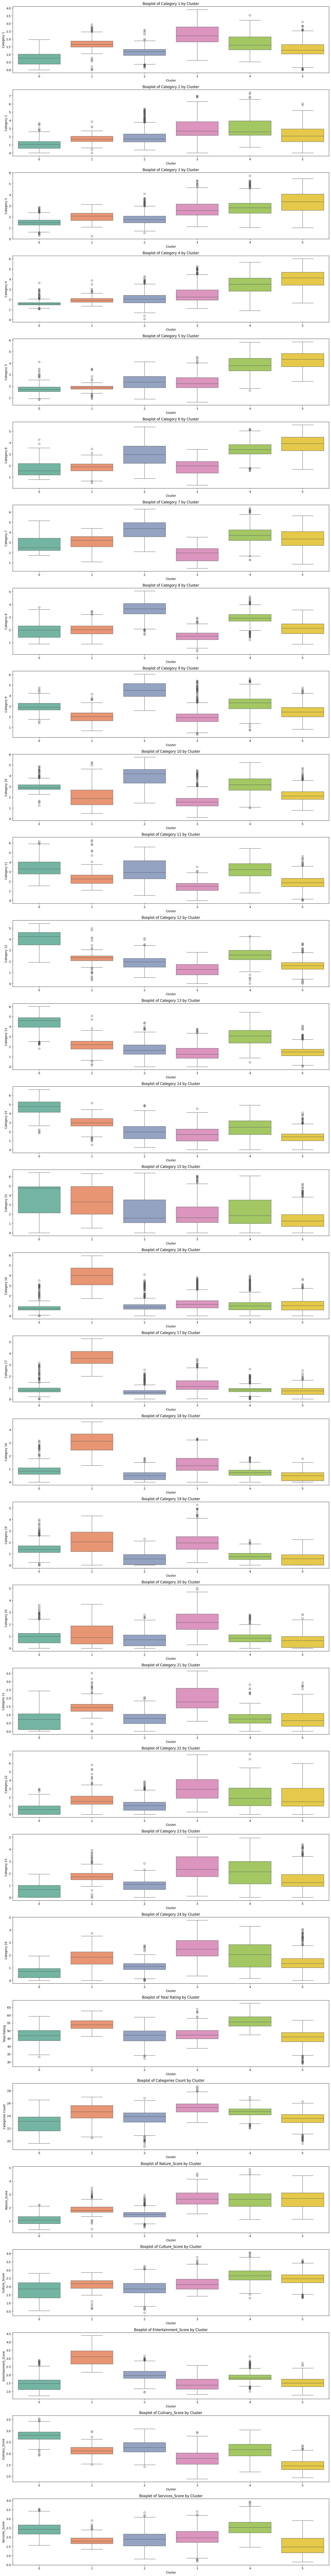

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat urutan variabel sesuai keinginan
ordered_columns = [f'Category {i}' for i in range(1, 26)] + [
    'Total Rating',
    'Categories Count',
    'Nature_Score',
    'Culture_Score',
    'Entertainment_Score',
    'Culinary_Score',
    'Services_Score'
]

# Filter hanya kolom yang benar-benar ada di df_inverse
numeric_cols = [col for col in ordered_columns if col in df_inverse.columns]

# Plot
plt.figure(figsize=(16, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df_inverse, x='Cluster', y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by Cluster')

plt.tight_layout()
plt.show()

**Category 1: Churches**

Pada boxplot *category 1*, terlihat bahwa klaster 3 memiliki nilai *rating* yang paling tinggi dibanding kluster lainnya. Artinya, pengguna yang masuk ke klaster 3 cenderung lebih puas pada destinasi wisata gereja. Selain klaster 3, pengguna pada klaster 4 juga memberikan *rating* yang lumayan tinggi. Berbeda dengan 3 klaster lainnya yang nilai *rating*-nya dapat mencapai angka 0 (meskipun angka ini juga tidak dapat menjadi acuan karena data hasil *inverse* tidak dapat sama persis seperti data asli).

**Category 2: Resorts**

Pada boxplot *category 2*, terlihat bahwa pengguna dari klaster 3 dan 4 juga memberikan nilai *rating* yang lebih tinggi terhadap destinasi resort daripada klaster lainnya. Nilai *rating* yang tersebar cukup rendah pada kategori ini berasal dari pengguna klaster 1 dan 2.

**Category 3: Beaches**

Pada *category 3*, klaster 5 memiliki boxplot yang paling simetris tanpa *outlier*, menandakan bahwa pengguna dari klaster 5 memiliki nilai *rating* yang paling seimbang dan memilki variasi yang pas. Nilai *rating* pengguna klaster 5 juga lebih tinggi dari klaster lain, menandakan bahwa pengguna dari klaster 5 cenderung menyukai destinasi pantai. Di sisi lain, nilai *rating* terendah dimiliki oleh pengguna dari klaster 0 yang menandakan bahwa pengguna dari klaster ini tidak menyukai destinasi pantai.

**Category 4: Parks**

Pada *category 4*, boxplot paling tinggi dan simetris dimiliki oleh data klaster 4 dan 5, menandakan bahwa pengguna dari klaster 5 juga cenderung menyukai destinasi taman. Di sisi lain, pengguna dari klaster 0 tidak terlalu menyukai taman. Kemudian, terlihat bahwa terdapat beberapa pengguna dari klaster 2 yang tidak tertarik dengan destinasi taman (ditandai oleh nilai yang sangat rendah di sekitar angka 0).



**Category 5: Theatres**

Boxplot *category 5* tidak berbeda jauh dengan boxplot *category* 4. Tetapi, boxplot paling simetris adalah boxplot klaster 2 dan 5, menandakan bahwa nilai *rating* dari pengguna kedua klaster ini tersebar dengan merata. Meskipun begitu, boxplot paling tinggi adalah boxplot klaster 4 dan 5 sehingga dapat diketahui bahwa pengguna dari kedua klaster ini juga menyukai destinasi teater.

**Category 6: Museums**

Pada *category 6*, terlihat bahwa boxplot paling simetris adalah boxplot klaster 2 dan 5, yang menandakan persebaran nilai *rating* yang merata antara pengguna pada kedua klaster tersebut. Selain itu, boxplot kedua klaster tersebut juga yang paling tinggi. Artinya, pengguna dari klaster 2 dan 5 cenderung menyukai destinasi museum.

**Category 7: Malls**

Pada *category 7*, hanya terdapat satu klaster yang memiliki *outlier*, yaitu klaster 4. Kemudian, boxplot klaster 3, 4, dan 5 memiliki bentuk yang cenderung simetris, menandakan nilai *rating* yang merata pada klaster tersebut. Boxplot yang berada pada kisaran nilai *rating* yang tinggi adalah klaster 2, menandakan ketertarikan serta puasnya pengguna dari klaster 2 terhadap destinasi mall.

**Category 8: Zoo**

Pada *category 8*, terlihat bahwa boxplot pada klaster 2 juga memiliki nilai *rating* yang tinggi, mengindikasikan puasnya pengguna klaster 2 terhadap destinasi kebun binatang. Sebaliknya, pengguna dari klaster 3 tidak begitu menyukai destinasi ini.

**Category 9: Restaurants**

Pada *category 9*, nilai *rating* tertinggi kembali dikuasai oleh pengguna dari klaster 2 dengan boxplot yang terlihat simetris. Nilai terendah berkisar pada angka 3 yang menunjukkan bahwa seluruh pengguna dari klaster 2 tertarik dan puas dengan destinasi restoran, berbeda dengan pengguna dari klaster 3.

**Category 10: Pub/Bars**

Pada *category 10*, terlihat bahwa pengguna dari klaster 2 kembali memberikan nilai *rating* yang tinggi untuk destinasi wisata pub atau bar, berbeda dengan pengguna dari klaster 3 yang sebagian penggunanya masih memberi *rating* buruk terhadap destinasi wisata ini.

**Category 11: Local Services**

Pada *category 11*, terlihat bahwa pengguna klaster 0 banyak memberikan *rating* yang bagus untuk pelayanan lokal/daerah, disusul oleh pengguna klaster 2 dan 4. Sementara itu, pengguna dari klaster 3 dan 5 terlihat tidak begitu menyukai pelayanan lokal/daerah.

**Category 12: Burger/pizza shops**

Pada *category 12*, dapat diketahui bahwa destinasi toko burger/pizza banyak disukai oleh pengguna dari klaster 0. Sementara itu, pengguna dari klaster 3 tidak begitu menyukai destinasi ini.

**Category 13: Hotels/Other Lodgings**

Pada *category 13*, dapat dilihat bahwa boxplot klaster 0 memiliki posisi yang lebih tinggi dari yang lain. Hal ini menandakan bahwa banyak pengguna dari klaster 0 yang tertarik dan puas dengan destinasi penginapan maupun hotel.

**Category 14: Juice Bars**

Visualisasi *category 14* tidak berbeda jauh dari *category 13*. Banyak pengguna dari klaster 0 yang menyukai destinasi berupa bar jus. 

**Category 15: Art Galleries**

Pada *category 15*, hampir semua boxplot berbentuk lebar dan memiliki *whisker* yang panjang sehingga dapat disimpulkan bahwa nilai *rating* pada klaster cukup menyebar. Meskipun begitu, dapat diketahui bahwa pengguna dari klaster 5 cenderung memberi *rating* rendah untuk destinasi galeri seni.

**Category 16: Dance Clubs**

Pada *category 16*, terlihat bahwa ada perbedaan nilai *rating* yang cukup mencolok antara klaster 1 dengan klaster yang lain. Ini menunjukkan bahwa pengguna dari klaster 1 cenderung tertarik dan puas dengan destinasi klub tari.

**Category 17: Swimming Pools**

Boxplot pada *category 17* tidak berbeda jauh dengan *category 16*. Pengguna dari klaster 1 cenderung menyukai destinasi kolam renang.

**Category 18: Gyms**

Pada *category 18* atau destinasi gym, nilai *rating* tinggi didominasi oleh pengguna dari klaster 1, disusul dengan pengguna klaster 0 dan 3. Namun, masih terdapat banyak pengguna dari klaster 0 dan 3 yang memberi nilai *rating* buruk atau bahkan tidak tertarik sama sekali dengan destinasi ini.

**Category 19: Bakeries**

Pada *category 19*, beberapa pengguna dari klaster 3 memberikan *rating* yang sangat baik terhadap destinasi toko roti (ditunjukkan oleh keberadaan *outlier* atas). Kemudian, sebagian pengguna dari klaster 1 juga memberikan nilai *rating* yang cukup baik meskipun sebagian lainnya memberi nilai yang rendah.

**Category 20: Beauty & Spas**

Pada *category 20*, sebagian pengguna dari klaster 3 memberikan nilai *rating* yang baik terhadap destinasi spa kecantikan, disusul oleh pengguna dari klaster 1 dan sebagian kecil pengguna dari klaster 0. Meskipun begitu, beberapa pengguna dari ketiga klaster tersebut juga memberikan nilai yang rendah atau bahkan sama sekali tidak tertarik dengan destinasi ini.

**Category 21: Cafes**

Pada *category 21*, terlihat bahwa banyak pelanggaran dari klaster 3 yang memberi nilai *rating* tinggi terhadap destinasi kafe, disusul oleh beberapa pengguna dari klaster 1.

**Category 22: View Points**

Boxplot *category 22* tidak berbeda jauh dengan *category 21*. Sebagian pengguna dari klaster 3 terlihat menyukai destinasi dengan pemandangan yang indah, disusul oleh beberapa pengguna klaster 4 dan 5.

**Category 23: Monuments**

Pada *category 23*, terlihat bahwa sebagian pengguna dari klaster 3 dan 4 menyukai destinasi monumen. Namun, boxplot dari kedua klaster ini cenderung simetris sehingga terdapat pengguna yang tidak menyukai atau bahkan tidak tertarik dengan destinasi ini.

**Category 24: Gardens**

Visualisasi *category 24* tidak berbeda jauh dengan *category 23*. Terlihat bahwa sebagian pengguna dari klaster 3 dan 4 menyukai destinasi kebun.

***Total Rating***

Terlihat bahwa klaster yang memberikan total nilai *rating* tertinggi adalah klaster 4. Artinya, banyak pengguna dari klster 4 yang puas dengan seluruh destinasi atau tempat wisata yang ada.

***Categories Count***

Dapat diketahui bahwa *categories count* terbanyak ada pada klaster 3. Artinya, pengguna dari klaster 3 memiliki banyak ketertarikan terhadap jenis-jenis destinasi yang ada.

***Nature Score***

Dapat dilihat bahwa pengguna dari klaster 3, 4, dan 5 cenderung tertarik pada destinasi alam daripada keenam klaster yang lain.

***Culture Score***

Terlihat bahwa pengguna klaster 4 tertarik dengan destinasi bertema kebudayaan, disusul oleh klaster 3 dan 5.

***Entertainment Score***

Pada destinasi hiburan, terlihat jelas bahwa jenis destinasi ini sangat diminati oleh pengguna dari klaster 1.

***Culinary Score***

Dapat dilihat bahwa pengguna dari klaster 1 cenderung tertarik dengan destinasi kuliner daripada klaster lainnya.

***Services Score***

Terlihat bahwa pengguna dari klaster 4 dan 1 tertarik dengan destinasi yang menyediakan pelayanan atau *service*.

### Visualisasi Fitur Kategorik

#### Distribusi `Dominant Interest Type` per Klaster

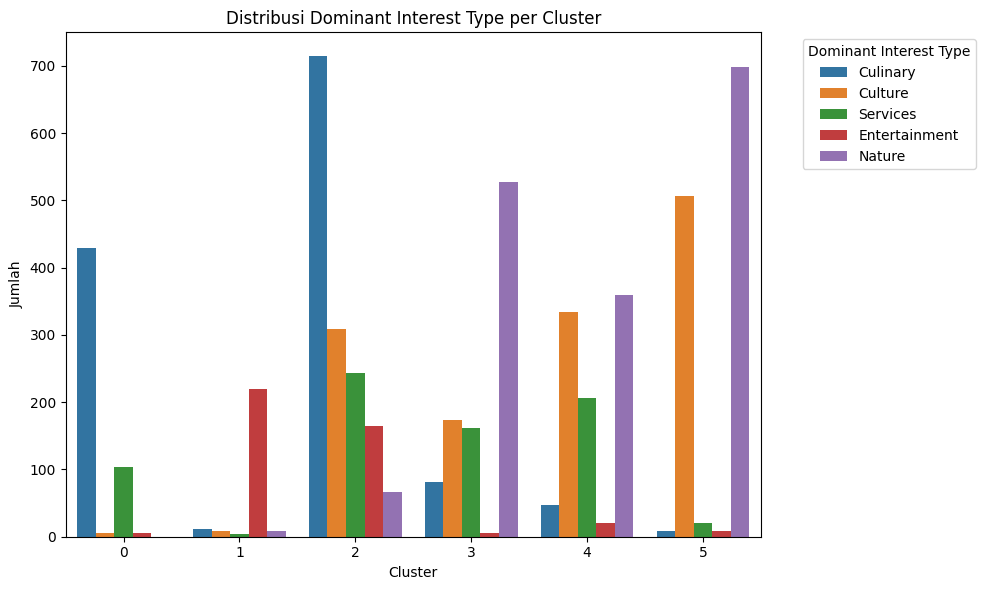

In [23]:
# Plot Variabel Kategorik per Numerik

plt.figure(figsize=(10, 6))
sns.countplot(data=df_inverse, x='Cluster', hue='Dominant Interest Type', palette='tab10')
plt.title('Distribusi Dominant Interest Type per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend(title='Dominant Interest Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Penjelasan:**

1. Cluster 0
    - Pengguna dari klaster ini cenderung tertarik dengan destinasi kuliner.
    - Selain kuliner, sebagian pegguna juga tertarik dengan destinasi bertema layanan.
2. Cluster 1
    - Pegguna dari klaster ini cenderung tertarik dengan destinasi hiburan.
3. Cluster 2
    - Pegguna dari klaster ini cenderung tertarik dengan destinasi kuliner.
    - Jenis destinasi lain yang diminati pengguna klaster 1 adalah kebudayaan, layanan, hiburan, dan terakhir adalah destinasi alam.
4. Cluster 3
    - Pengguna dari klaster ini cenderung tertarik dengan destinasi alam.
    - Jenis destinasi lain yang diminati adalah kebudayaan, layanan, dan kuliner.
    - Jenis destinasi yang peminatnya paling sedikit adalah destinasi hiburan.
5. Cluster 4
    - Pengguna dari klaster ini cenderung tertarik dengan destinasi alam, disusul oleh destinasi kebudayaan dengan selisih yang kecil.
    - Destinasi lain yang diminati adalah destinasi bertema layanan.
    - Hanya sedikit pengguna dari klaster ini yang tertarik dengan destinasi kuliner dan hiburan.
6. Cluster 5
    - Pengguna dari klaster ini cenderung tertarik dengan destinasi alam.
    - Destinasi kedua yang diminati adalah destinasi kebudayaan.
    - Terlihat bahwa hanya sedikit pengguna yang tertarik terhadap ketiga jenis destinasi lain.

#### Proporsi `Dominant Interest Type` per Klaster

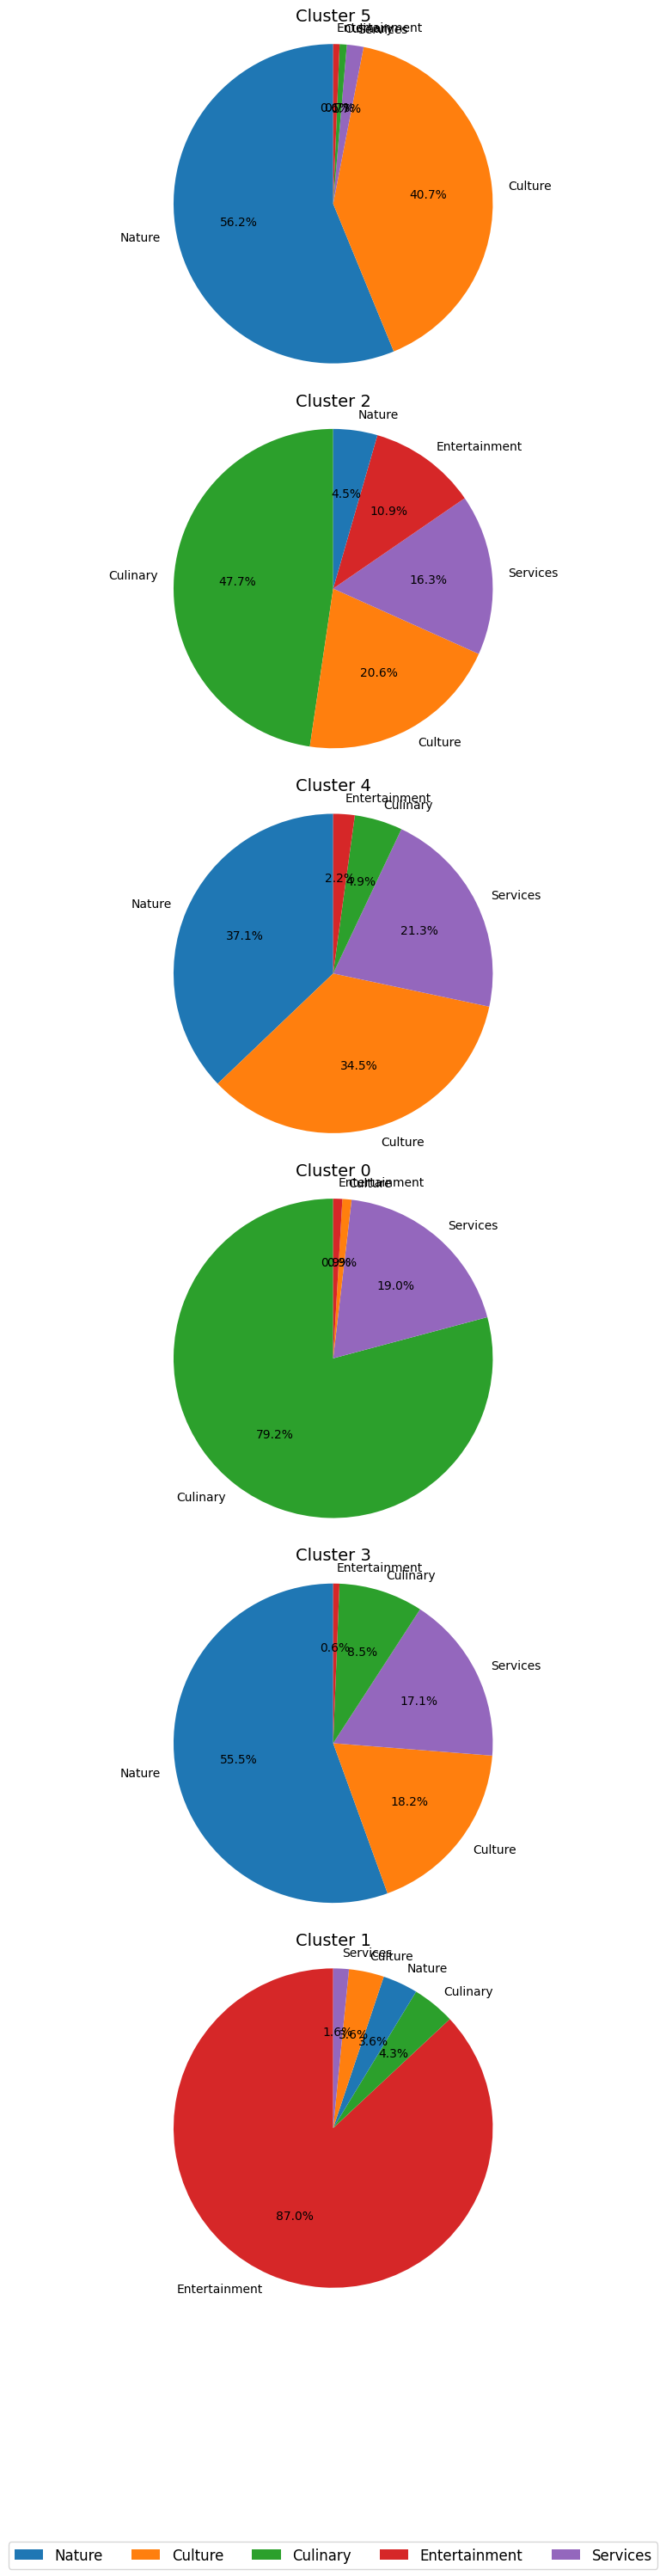

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Definisikan warna per kategori
color_map = {
    'Nature': '#1f77b4',         # Biru
    'Culture': '#ff7f0e',        # Oranye
    'Culinary': '#2ca02c',       # Hijau
    'Entertainment': '#d62728',  # Merah
    'Services': '#9467bd'        # Ungu
}

clusters = df_inverse['Cluster'].unique()
num_clusters = len(clusters)

fig, axs = plt.subplots(num_clusters, 1, figsize=(6, 5 * num_clusters))

for i, cluster in enumerate(clusters):
    cluster_data = df_inverse[df_inverse['Cluster'] == cluster]
    interest_counts = cluster_data['Dominant Interest Type'].value_counts()
    
    labels = interest_counts.index
    values = interest_counts.values
    colors = [color_map[label] for label in labels]
    
    axs[i].pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'Cluster {cluster}', fontsize=14)

# Tambahkan legend
legend_elements = [Patch(facecolor=color, label=label) for label, color in color_map.items()]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(color_map), fontsize=12)

plt.tight_layout(rect=[0, 0.1, 1, 1]) 
plt.show()

**Penjelasan:**

1. **Cluster 0:** didominasi oleh jenis destinasi kuliner (79.2%), disusul oleh destinasi layanan atau *service* (19.0%).
2. **Cluster 1:** didominasi oleh destinasi hiburan (87.0%), destinasi lain tidak mendominasi (proporsi di bawah 5%).
3. **Cluster 2:** didominasi oleh destinasi kuliner (47.7%), disusul oleh destinasi kebudayaan (20.6%) dan layanan atau *service* (16.3%).
4. **Cluster 3:** didominasi oleh destinasi alam (55.5%), disusul oleh destinasi kebudayaan (18.2%) dan layanan atau *service* (17.1%).
5. **Cluster 4:** didominasi oleh destinasi alam (37.1%), kebudayaan (34.5%) dan layanan atau *service* (21.3%).
6. **Cluster 5:** didominasi oleh destinasi alam (56.2%) dan kebudayaan (40.7%), destinasi lain tidak mendominasi (proporsi di bawah 2%).

### Statistik Deskriptif tiap Variabel

In [35]:
# Tampilkan lebih banyak kolom
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)        # Menyesuaikan lebar tampilan otomatis
pd.set_option('display.max_colwidth', None) # Hindari pemotongan kolom panjang

numeric_cols = num_cols.columns.tolist()
# Menampilkan statistik deskriptif
desc_stats = df_inverse.groupby('Cluster')[numeric_cols].agg(['min', 'max', 'mean', 'median']).round(2)
display(desc_stats) 

Category 1                    Category 2                     \
               min   max  mean median        min   max  mean median   
Cluster                                                               
0             0.00  1.96  0.72   0.76       0.00  3.61  1.02   1.04   
1             0.00  2.93  1.69   1.65       0.00  3.82  1.73   1.68   
2             0.13  2.57  1.13   1.18       0.36  5.41  2.07   1.72   
3             0.61  3.90  2.24   2.20       0.00  7.00  2.98   2.67   
4             0.52  3.54  1.72   1.60       0.69  7.39  2.98   2.58   
5             0.00  3.11  1.32   1.27       0.00  6.03  2.31   2.07   

        Category 3                    Category 4                     \
               min   max  mean median        min   max  mean median   
Cluster                                                               
0             0.33  2.87  1.51   1.49       1.06  3.64  1.62   1.57   
1             0.26  3.13  2.02   2.06       1.33  3.86  1.95   1.92   
2             0.54  4.10  1.81   1.75       0.06  4.25  2.07   2.05   
3             1.10  5.29  2.71   2.56       1.12  5.26  2.54   2.24   
4             1.04  5.73  2.90   2.82       0.89  5.68  3.51   3.50   
5             1.01  5.47  3.34   3.37       1.64  6.01  4.00   4.13   

        Category 5                    Category 6                     \
               min   max  mean median        min   max  mean median   
Cluster                                                               
0             0.83  4.11  1.75   1.70       0.78  4.28  1.70   1.55   
1             0.92  3.50  1.88   1.88       0.50  3.46  1.83   1.89   
2             0.88  4.11  2.36   2.36       0.87  5.38  2.99   2.97   
3             0.61  4.53  2.28   2.22       0.29  3.42  1.89   1.98   
4             1.65  5.82  3.86   3.79       1.55  5.18  3.40   3.40   
5             2.42  5.85  4.25   4.33       1.68  5.55  3.89   3.93   

        Category 7                    Category 8                     \
               min   max  mean median        min   max  mean median   
Cluster                                                               
0             1.71  5.14  2.74   2.48       0.87  3.76  1.91   1.97   
1             1.08  4.38  3.09   3.22       0.89  3.45  2.04   2.01   
2             2.08  6.30  4.30   4.36       1.62  5.06  3.62   3.65   
3             0.45  3.53  1.87   1.97       0.30  2.93  1.50   1.51   
4             1.27  6.40  3.76   3.69       1.21  4.63  2.93   2.92   
5             0.85  5.64  3.34   3.34       0.86  3.58  2.12   2.13   

        Category 9                    Category 10                     \
               min   max  mean median         min   max  mean median   
Cluster                                                                
0             1.43  4.77  2.97   2.91        1.22  4.86  2.99   2.90   
1             0.67  4.15  2.04   2.01        0.49  5.22  1.96   1.89   
2             2.60  6.04  4.51   4.50        1.45  5.72  3.99   4.18   
3             0.33  5.41  2.05   1.93        0.11  4.52  1.66   1.54   
4             0.72  5.63  3.27   3.31        1.02  5.22  3.19   3.15   
5             0.82  4.76  2.46   2.46        0.77  4.71  2.16   2.12   

        Category 11                    Category 12                     \
                min   max  mean median         min   max  mean median   
Cluster                                                                 
0              1.53  6.16  3.49   3.28        1.92  5.42  4.05   4.23   
1              1.08  6.28  2.31   2.26        0.31  4.96  2.26   2.32   
2              0.53  5.59  3.09   2.92        0.56  4.09  1.92   1.95   
3              0.00  3.51  1.44   1.50        0.00  2.81  1.27   1.28   
4              0.81  5.44  3.22   3.22        0.00  4.26  2.55   2.56   
5              0.00  4.62  1.86   1.87        0.04  3.62  1.62   1.62   

        Category 13                    Category 14                     \
                min   max  mean median         min   max  mean media

**Penjelasan:**

1. **Cluster 0:** memiliki nilai mean yang tinggi pada kategori 9–15.
2. **Cluster 1:** memiliki nilai mean yang tinggi pada kategori 15-18.
3. **Cluster 2:** memiliki nilai mean yang tinggi pada kategori 7-11.
4. **Cluster 3:** memiliki nilai mean yang tinggi pada kategori 22.
5. **Cluster 4:** memiliki nilai mean yang tinggi pada kategori 5-11.
6. **Cluster 5:** memiliki nilai mean yang tinggi pada kategori 3-7.

In [32]:
# Tampilkan lebih banyak kolom
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)        # Menyesuaikan lebar tampilan otomatis
pd.set_option('display.max_colwidth', None) # Hindari pemotongan kolom panjang

# Statistik deskriptif untuk fitur kategorikal per klaster (modus)
desc_stats_categorical = df_inverse.groupby('Cluster')['Dominant Interest Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print("\nStatistik Kategorikal (Modus):")
display(desc_stats_categorical)


Statistik Kategorikal (Modus):


Cluster
0         Culinary
1    Entertainment
2         Culinary
3           Nature
4           Nature
5           Nature
Name: Dominant Interest Type, dtype: object

**Penjelasan:**
*Output* di atas menampilkan modus jenis ketertarikan utama pada setiap klaster. Hasilnya, sebagian besar pengguna pada klaster 0 dan 2 cenderung tertarik pada kuliner, klaster 1 tertarik pada hiburan, klaster 3, 4, dan 5 tertarik pada alam.

### Hasil Profiling

Berdasarkan visualisasi dan statistik deskriptif dari setiap klaster, maka hasil *profilling* pelanggan tiap klaster adalah sebagai berikut.
1. **Cluster 0: Wisatawan Gaya Kota**
    - Minat utama: kuliner dan layanan.
    - Pelanggan yang lebih menyukai pengalaman praktis dan konsumtif seperti makanan, spa, dan akomodasi.
2. **Cluster 1: Penggemar Hiburan**
    - Minat utama: hiburan.
    - Tipe pelanggan yang mencari aktivitas aktif, ramai, dan menyenangkan, seperti klub malam, kolam renang, gym, dan tempat rekreasi lainnya.
3. **Cluster 2: *Social Explorer***
    - Minat utama: kuliner, layanan, dan hiburan.
    - Pelanggan dengan preferensi yang cukup seimbang, didominasi oleh kuliner tapi juga tertarik pada museum, mall, dan tempat budaya populer.
    - Tertarik mencoba banyak jenis destinasi, dengan keseimbangan antara eksplorasi budaya, kuliner, dan fasilitas.
4. **Cluster 3: Pecinta Alam**
    - Minat utama: alam.
    - Pelanggan ini menyukai destinasi yang tenang, eksploratif, dan memiliki nilai edukatif seperti taman, gereja, galeri seni, dan *viewpoint*.
5. **Cluster 4: Penjelajah**
    - Minat utama: alam, kebudayaan, layanan (cukup seimbang).
    - Pelanggan yang memiliki ketertarikan seimbang pada wisata edukatif, visual, dan praktis.
    - Memiliki preferensi yang lebih beragam untuk setiap individu dan cocok untuk wisata dengan tema yang beragam.
6. **Cluster 5: Pencari Ketenangan**
    - Minat utama: alam dan kebudayaan.
    - Pelanggan yang sangat fokus pada destinasi alami dan bersejarah dan tidak tertarik pada hiburan, layanan, atau kuliner.

# Kesimpulan dan Rekomendasi

## Kesimpulan

Pemodelan *clustering* dilakukan untuk mengetahui karakteristik *user* atau pengguna yang memberikan *rating* terhadap 24 kategori destinasi atau tempat wisata. Pada tugas ini, dijalankan 4 algoritma *clustering* dengan 2 skema, yaitu tanpa *dimensionality reduction* dan dengan *dimensionality reduction*. Algoritma-algoritma tersebut adalah sebagai berikut.
1. *K-means Clustering*
2. *K-medoids Clustering*
3. *Agglomerative Hierarchical Clustering*
4. *Gaussian Mixture Model* (GMM)

Setelah dilakukan pemodelan dan visualisasi *clustering*, model-model tersebut dievaluasi dengan 4 metrik evaluasi sebagai berikut.
1. *Silhouette Score*
2. *Davies-Bouldin Index*
3. *Calinski-Harabasz Index*
4. *Sum of Squared Errors*

Hasil evaluasi menyatakan bahwa model *clustering* terbaik adalah *k-means* skema 2, yaitu hasil *dimensionality reduction* dengan PCA dan MCA. Pada model ini, banyaknya klaster adalah 6. Kemudian, dilakukan *inverse transform* pada data agar data dapat kembali ke bentuk semula. Setelah itu, dilakukan visualisasi dan ditampilkan statistik deskriptif untuk mengetahui karakteristik dari setiap klaster. Hasilnya, didapatkan karakteristik pengguna sebagai berikut.
* **Wisatawan Gaya Kota:** pengguna yang lebih menyukai pengalaman praktis dan konsumtif seperti makanan, spa, dan akomodasi.
* **Penggemar Hiburan:** pengguna yang mencari aktivitas aktif, ramai, dan menyenangkan, seperti klub malam, kolam renang, gym, dan tempat rekreasi lainnya.
* ***Social Explorer*:** pengguna dengan preferensi yang cukup seimbang, didominasi oleh kuliner tapi juga tertarik pada museum, mall, dan tempat budaya populer..
* **Pecinta Alam:** pengguna yang menyukai destinasi yang tenang, eksploratif, dan memiliki nilai edukatif seperti taman, gereja, galeri seni, dan *viewpoint*.
* **Penjelajah:** pengguna yang memiliki ketertarikan seimbang pada wisata edukatif, visual, dan praktis, serta memiliki preferensi yang lebih beragam sehingga cocok untuk wisata dengan tema yang beragam.
* **Pencari Ketenangan:** pengguna yang sangat fokus pada destinasi alami dan bersejarah dan tidak tertarik pada hiburan, layanan, atau kuliner.


## Rekomendasi

Berdasarkan hasil pemodelan *clustering* dan karakteristik pengguna yang teridentifikasi, strategi personalisasi rekomendasi wisata dapat diterapkan untuk meningkatkan pengalaman pengguna dan efektivitas promosi destinasi. Misalnya, untuk klaster **Wisatawan Gaya Kota**, disarankan untuk merekomendasikan destinasi dengan fasilitas modern dan akses mudah seperti restoran ternama, hotel berbintang, dan spa mewah. Klaster **Penggemar Hiburan** cocok dengan paket wisata bertema hiburan malam atau atraksi keluarga, seperti taman bermain dan pusat kebugaran. Sementara itu, klaster ***Social Explorer*** dapat ditarget dengan wisata kota yang menawarkan pengalaman kuliner otentik sekaligus memiliki nilai budaya populer. Untuk klaster **Pecinta Alam**, destinasi yang menawarkan panorama alam, area konservasi, atau wisata spiritual akan lebih menarik. Klaster **Penjelajah** membutuhkan variasi rekomendasi lintas tema yang memungkinkan eksplorasi multidestinasi dalam satu perjalanan. Sedangkan untuk klaster **Pencari Ketenangan**, disarankan untuk menyuguhkan destinasi yang tenang dan terpencil seperti desa wisata, situs sejarah, dan taman nasional. Dengan pendekatan ini, promosi wisata tidak hanya menjadi lebih tepat sasaran, tetapi juga mampu membangun loyalitas pengguna melalui pengalaman yang sesuai preferensi mereka.

# Daftar Pustaka

* Telgaonkar, A. H., & Deshmukh, S. (2015). Dimensionality reduction and classification through PCA and LDA. International Journal of Computer Applications, 122(17). https://research.ijcaonline.org/volume122/number17/pxc3905104.pdf
* Lee, D.-H., Kim, J.-W., Cong, R., Park, J.-S., Nguyen, C. H. B., Park, K., Kang, K., & Shim, S.-M. (2023). Exploring absorption indices for a variety of polyphenols through Caco-2 cell model: Insights from permeability studies and principal component analysis. Journal of the Science of Food and Agriculture. https://doi.org/10.1002/jsfa.14339
* Hendrawan, R. (2011). Analisis korespondensi multipel (multiple correspondence analysis (MCA)) untuk skala pengukuran data yang berbeda (kualitatif dan kuantitatif). BIAStatistics Journal of Statistics Theory and Application, 5(1), 48–59. https://doi.org/10.1234/bias.v5i1.64
* Kaufman, L., & Rousseeuw, P. J. (1990). Finding groups in data: An introduction to cluster analysis. Wiley.
* Rokach, L., & Maimon, O. (2005). Clustering methods. In The data mining and knowledge discovery handbook (pp. 321–352). Springer.
* Bishop, C. M. (2006). Pattern recognition and machine learning. Springer.